# Lead Score - Case Study

<b><font color = maroon>Problem Statement</font></b><br>

<p align="justify">X Education is an education company that offers online courses for industry professionals. The company attracts many visitors to its website through various marketing channels. The company faces a problem: its lead conversion rate is very low. Out of 100 leads, only 30 become customers on average.</p>

<p align="justify">To solve this problem, X Education wants to identify the most potential leads, also known as ‘Hot Leads’. The company has hired you to help them with this task. Your job is to build a model that can assign a lead score to each lead based on various factors, such as their demographics, behavior, preferences, etc. The higher the lead score, the more likely the lead is to convert. The lower the lead score, the less likely the lead is to convert. The company’s CEO has set a target of achieving an 80% lead conversion rate with this model.</p>

<b><font color = maroon>Goals and Objective</font></b><br>
- <p align="justify">Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.</p>
- <p align="justify">There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.</p>

#### Steps Followed  
- Reading Data
- Cleaning Data
- Data Visualization
- Data Preparation
- Model Builiding
- ROC Curve
- Model Evaluations
- Prediction on test set
- Conclusion

## Step 1: Reading and Understanding the Data

In [196]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

In [197]:
lead_df=pd.read_csv('C:/Users/SMohammed2/Desktop/Self/Leads.csv') # Reading leads dataframe as lead_df

lead_df_original = lead_df.copy()
lead_df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0         0.00   
1  Organic Search           No          No          0         5.00   
2  Direct Traffic           No          No          1         2.00   
3  Direct Traffic           No          No          0         1.00   
4          Google           No          No          1         2.00   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                  0.00  ...   
1                          674                  2.50  ...   
2                         1532                  2.00  ...   
3                          305                  1.00  ...   
4                         1428                  1.00  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                       15.00                      15.00   
1                       15.00                      15.00   
2                       14.00                      20.00   
3                       13.00                      17.00   
4                       15.00                      18.00   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [198]:
lead_df.describe()

Lead Number  Converted  TotalVisits  Total Time Spent on Website  \
count      9240.00    9240.00      9103.00                      9240.00   
mean     617188.44       0.39         3.45                       487.70   
std       23406.00       0.49         4.85                       548.02   
min      579533.00       0.00         0.00                         0.00   
25%      596484.50       0.00         1.00                        12.00   
50%      615479.00       0.00         3.00                       248.00   
75%      637387.25       1.00         5.00                       936.00   
max      660737.00       1.00       251.00                      2272.00   

       Page Views Per Visit  Asymmetrique Activity Score  \
count               9103.00                      5022.00   
mean                   2.36                        14.31   
std                    2.16                         1.39   
min                    0.00                         7.00   
25%                    1.00                        14.00   
50%                    2.00                        14.00   
75%                    3.00                        15.00   
max                   55.00                        18.00   

       Asymmetrique Profile Score  
count                     5022.00  
mean                        16.34  
std                          1.81  
min                         11.00  
25%                         15.00  
50%                         16.00  
75%                         18.00  
max                         20.00

In [199]:
# Inspect the various aspects of the data dataframe
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Step 2: Data Cleaning

In [200]:
# To check for duplicates
lead_df.loc[lead_df.duplicated()]

Empty DataFrame
Columns: [Prospect ID, Lead Number, Lead Origin, Lead Source, Do Not Email, Do Not Call, Converted, TotalVisits, Total Time Spent on Website, Page Views Per Visit, Last Activity, Country, Specialization, How did you hear about X Education, What is your current occupation, What matters most to you in choosing a course, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Tags, Lead Quality, Update me on Supply Chain Content, Get updates on DM Content, Lead Profile, City, Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score, I agree to pay the amount through cheque, A free copy of Mastering The Interview, Last Notable Activity]
Index: []

[0 rows x 37 columns]

In [201]:
# Checking datatype of columns:-

lead_df.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

### Observation
- Total 7 numeric columns and 30 categorical columns.
- None of the columns have inconsistent datatype, hence no conversion is required.

In [202]:
# Checking for duplicates and dropping the entire duplicate row if any:-

lead_df.drop_duplicates(subset=None, inplace=True)

In [203]:
# Checking shape after dropping duplicates:-
lead_df.shape

(9240, 37)

### Observation
- Since the shape before and after dropping duplicate is same hence it seems no duplicate values in the dataset. 

#### Note: There are some categorical variables have a level called 'Select' which needs to be handled.
### Finding which columns having level 'Select' 

Specialization
How did you hear about X Education
Lead Profile
City

### Observation
We found that column 'Specialization','How did you hear about X Education','Lead Profile' and 'City' having 'Select' level.Which means the customer had not selected option while filling form.So it is better to impute will 'Null' values.

In [204]:
# Imputing 'Select' with NaN'  :-

lead_df = lead_df.replace('Select', np.nan)

In [205]:
# After 'NaN' imputation Checking 'Select' level is available or not:-

cols=list(lead_df.columns)
for i in cols:
    if 'Select' in lead_df[i].values:
        print(i)

### Checking Null/Missing values

In [206]:
# Checking null values column wise:-

lead_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [207]:
#Checking percentage of missing/null values :-

round(100*(lead_df.isnull().sum()/len(lead_df)),2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                         26.63
Specialization                                  36.58
How did you hear about X Education              78.46
What is your current occupation                 29.11
What matters most to you in choosing a course   29.32
Search                                           0.00
Magazine                                         0.00
Newspaper Article           

### Observation
1) Below coloumns having missing value ~45% and these columns are assigned by sales team after call:-
- Asymmetrique Activity Index                      
- Asymmetrique Profile Index                       
- Asymmetrique Activity Score                      
- Asymmetrique Profile Score 
2) - How did you hear about X Education 
  - Lead Profile
Above two columns having more than 70% missing values so better to drop them.
  
3) -Lead Quality having ~51% missing values so we can drop it.

4) - City column having ~39% missing values and if we will impute mode or most frequent value for missing value then our data will be some what biased.So better to drop it.

#### Note:-Lead Quality, Tags, Asymmetrique scores ,Profile and Last Notable Activity are created by the sales team after contacting the leads so we can drop these columns.

5) For rest of the columns we will do analysis wheather we will drop it or not.

### Missing Value Treatment 

<font color='blue'>Dropping Columns having missing values more than 30%</font>

In [208]:
# Listing all the columns having more than 30% missing values into 'missing_columns':-

missing_columns_30 = lead_df.columns[100*(lead_df.isnull().sum()/len(lead_df)) > 30]
print(missing_columns_30)

Index(['Specialization', 'How did you hear about X Education', 'Tags',
       'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')


In [209]:
miss_col=missing_columns_30.drop('Specialization')

#### <font color=blue> Note:-Creating a new dataframe 'lead_df1' as copy of original dataframe 'lead_df' so that while dropping missing value columns our original dataframe remains unaffected</font>

In [210]:
# Creating copy of original datarframe :-

lead_df1=lead_df.copy()

In [211]:
# Droping the columns having more than 30% missing values:-

lead_df1 = lead_df1.drop(miss_col, axis=1).copy()

In [212]:
# Checking dimension after dropping columns:-

lead_df1.shape

(9240, 28)

In [213]:
# Checking the remaining columns for missing values:-

round(100*(lead_df1.isnull().sum()/len(lead_df1)),2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                         26.63
Specialization                                  36.58
What is your current occupation                 29.11
What matters most to you in choosing a course   29.32
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

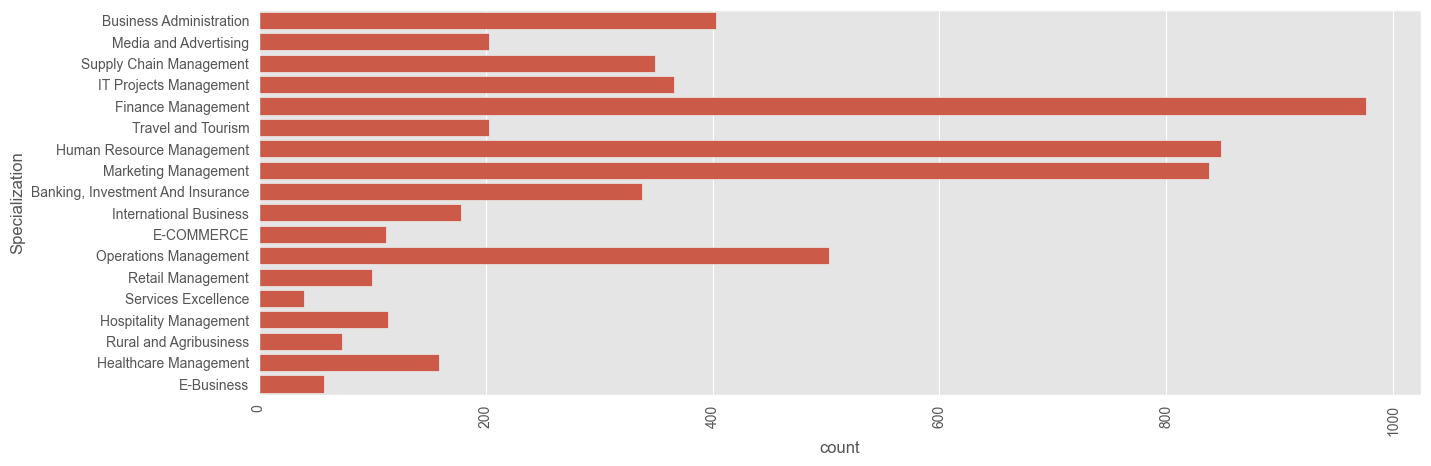

In [214]:
# Plotting count plot of 'Specialization' to see the data distribution:-

plt.figure(figsize=(15,5))
sns.countplot(lead_df1['Specialization'])
plt.xticks(rotation=90)
plt.show()

In [215]:
# Imputing missing value with 'Other' :-

lead_df1['Specialization'].fillna('Other',inplace=True)

In [216]:
# Listing all the columns having missing values into 'remaining_missing':-

remaining_missing = lead_df1.columns[(100*(lead_df1.isnull().sum()/len(lead_df1)) < 30) & (100*(lead_df1.isnull().sum()/len(lead_df1)) >0) ]
print(remaining_missing)

Index(['Lead Source', 'TotalVisits', 'Page Views Per Visit', 'Last Activity',
       'Country', 'What is your current occupation',
       'What matters most to you in choosing a course'],
      dtype='object')


In [217]:
# Checking value counts of 'What is your current occupation' variable:-

lead_df1['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

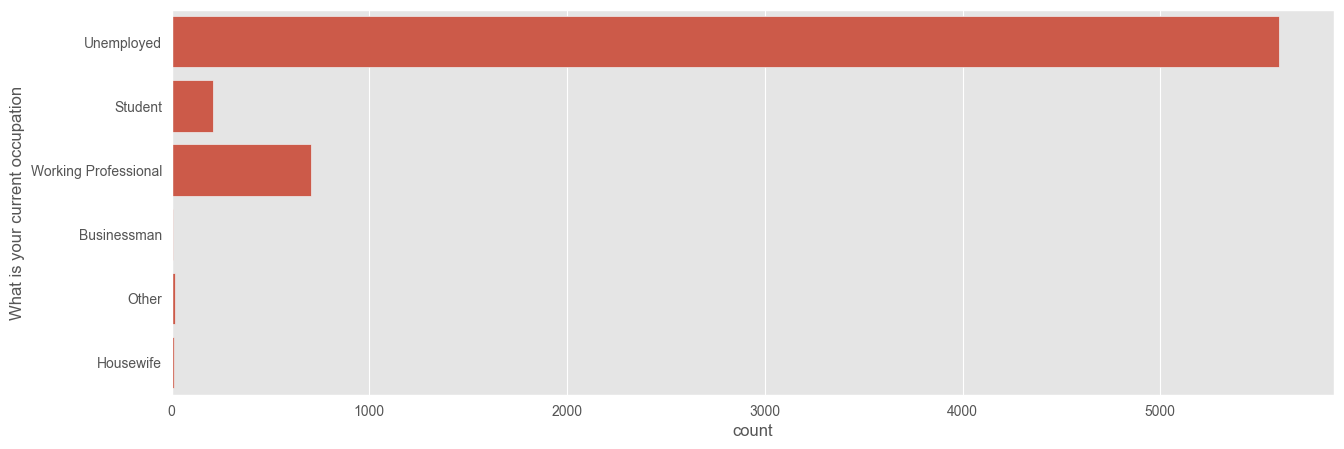

In [218]:
# Plotting count plot to check data counts in column 'What is your current occupation':-

plt.figure(figsize=(15,5))
sns.countplot(lead_df1['What is your current occupation'])
plt.show()

### Observation
We see that 'Unemployed' count is highest but we will impute missing values with 'Other' considering we do not know current occupation of lead.So we will create a separate category called 'Other'.

In [219]:
# Imputing missing value with 'Other' :-

lead_df1['What is your current occupation'].fillna('Other',inplace=True)

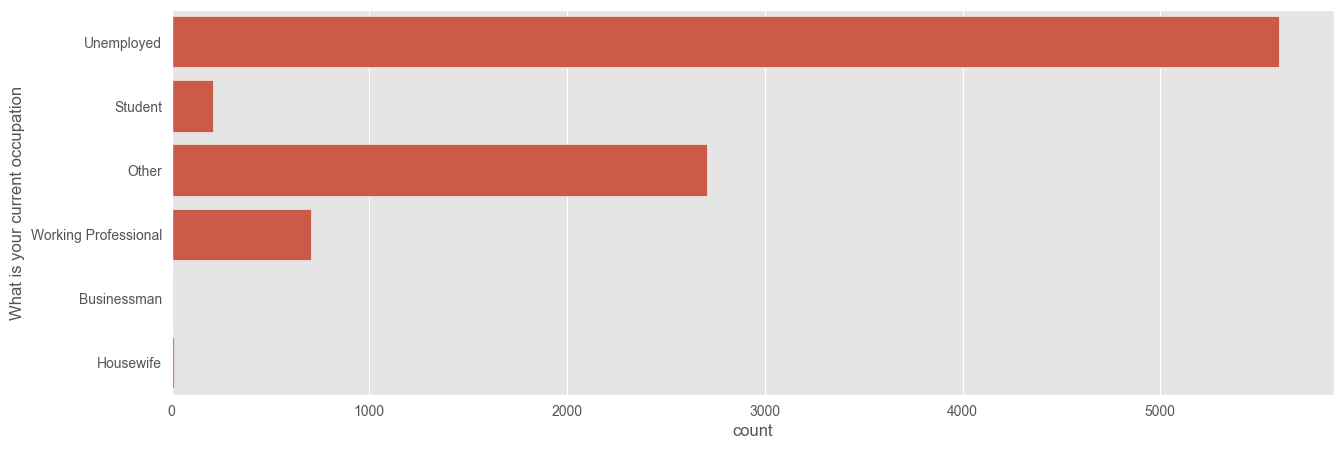

In [220]:
# Checking count of 'Other' after impuataion:-

plt.figure(figsize=(15,5))
sns.countplot(lead_df1['What is your current occupation'])
plt.show()

In [221]:
# Checking value count of 'What matters most to you in choosing a course' variable:-

lead_df1['What matters most to you in choosing a course'].value_counts(normalize=True)*100

What matters most to you in choosing a course
Better Career Prospects     99.95
Flexibility & Convenience    0.03
Other                        0.02
Name: proportion, dtype: float64

### Observation 

'Better Career Prospects' is the most frequent value so we can replace missing value with 'Better Career Prospects'.

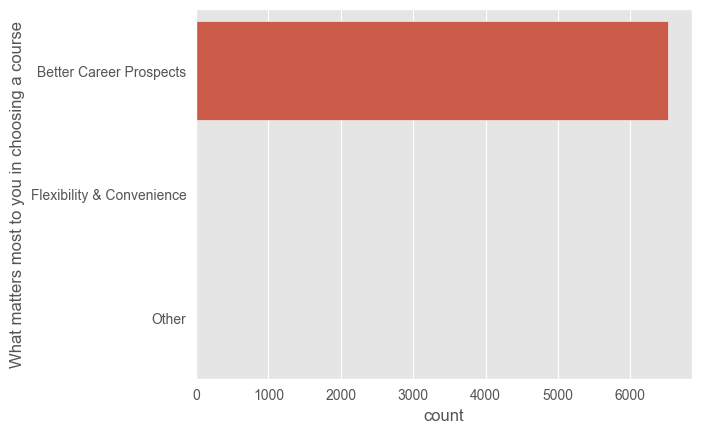

In [222]:
# Verifying counts by ploting count plot:-

sns.countplot(lead_df1['What matters most to you in choosing a course'])
plt.show()

In [223]:
# Checking value counts of 'Country' column:-

lead_df1.Country.value_counts()

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

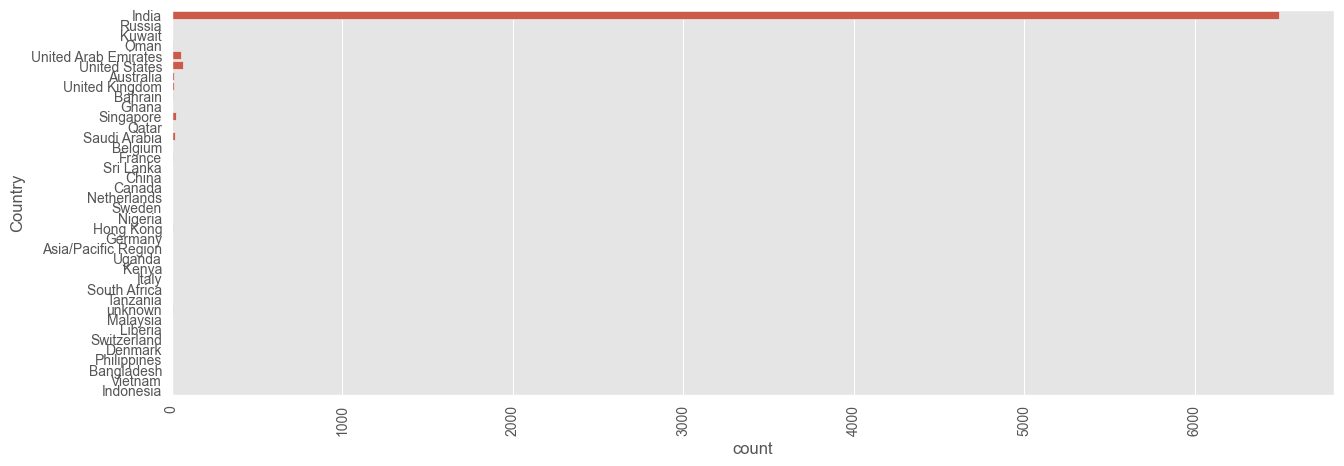

In [224]:
# Plotting count plot to visualize counts of data of 'Country' column:-

plt.figure(figsize=(15,5))
sns.countplot(lead_df1['Country'])
plt.xticks(rotation=90)
plt.show()

### Observation
From count plot we can see that 'India' count is highest so we can impute missing values with 'India'

In [225]:
# Replacing missing values with most frequent value 'India' in categorical column 'Country':-

lead_df1.Country.fillna('India',inplace=True)

In [226]:
lead_df1.Country.value_counts()

Country
India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

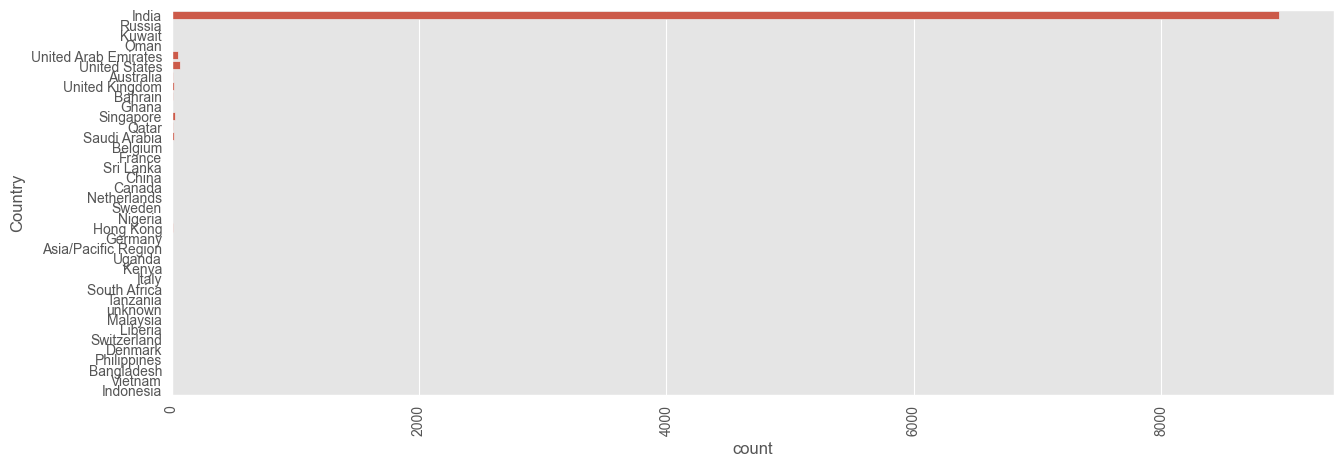

In [227]:
# To verify plotting count plot after imputation:-

plt.figure(figsize=(15,5))
sns.countplot(lead_df1['Country'])
plt.xticks(rotation=90)
plt.show()

### Observation

Before imputation in 'Country' column % of 'india' was ~70% but after imputing missing values with 'India' it's % became ~96% ,which will not contribute much in analysis so better to drop it cause data is skewed here.

In [228]:
# Dropping 'Country' column from dataframe:-

lead_df1.drop(columns=['Country'],inplace=True)

In [229]:
# Checking value counts of 'Lead Source':-

lead_df1['Lead Source'].value_counts()

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

### Observation 
- From above data we can see that there are two 'Google' and 'google' ,so better to replace 'google' with 'Google'.

- 'Google' is having highest number occurance so we can impute missing values with 'Google'.

In [230]:
# Replace 'google' with 'Google' :-

lead_df1['Lead Source']=lead_df1['Lead Source'].replace('google','Google')

In [231]:
# Verifying value counts again:-

lead_df1['Lead Source'].value_counts()

Lead Source
Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: count, dtype: int64

In [232]:
# Imputing missing values with 'Google':-

lead_df1['Lead Source'].fillna('Google',inplace=True)

#### Treating ~1% missing value columns

In [233]:
# Checking value counts of 'Last Activity':-

lead_df1['Last Activity'].value_counts()

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

### Observation

As we do not know the last activity of leads which are missing values and most frequent value is 'Email Opened' so we can impute missing value with 'Email Opened'.

In [234]:
# Imputing missing values with 'Email Opened':-

lead_df1['Last Activity'] = lead_df1['Last Activity'].replace(np.nan, 'Email Opened')

In [235]:
# Imputing missing value with 'median' value for both 'TotalVisits' and 'Page Views Per Visit' columns:-

lead_df1['TotalVisits'].fillna(lead_df1['TotalVisits'].median(), inplace=True)

lead_df1['Page Views Per Visit'].fillna(lead_df1['Page Views Per Visit'].median(), inplace=True)

In [236]:
# Now checking shape of the dataframe:-

lead_df1.shape

(9240, 27)

In [237]:
# Checking missing values after treating missing values:-

round(100*(lead_df1.isnull().sum()/len(lead_df1)),2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      0.00
Total Time Spent on Website                      0.00
Page Views Per Visit                             0.00
Last Activity                                    0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course   29.32
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

### Observation 
We can see that there is no missing values now,so we can proceed with next task

### Checking 'Prospect ID' and 'Lead Number' columns 

In [238]:
# Checking duplicate values in 'Prospect ID':-

lead_df1.duplicated(subset = 'Prospect ID').sum()

0

In [239]:
# Checking duplicate values in 'Lead Number':-

lead_df1.duplicated(subset = 'Lead Number').sum()

0

### Observation 
'Prospect ID' and 'Lead Number' both do not have duplicate values means these columns identify each data uniquely so working as unique Id and will not make any significant impact on our model.So we can drop it.

In [240]:
# Dropping 'Prospect ID' and 'Lead Number' variables:-

lead_df1.drop(columns=['Prospect ID','Lead Number'],inplace=True)

### Value_counts of variables to check data balancing

In [241]:
# Checking the value_counts of remaining variables for better data understanding :-

cols=list(lead_df1.iloc[:,:])  # Creating list 'cols' of variables


for i in cols:
    print(i,'=====')
    print(lead_df1[i].value_counts(), '\n')

Lead Origin =====
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64 

Lead Source =====
Lead Source
Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: count, dtype: int64 

Do Not Email =====
Do Not Email
No     8506
Yes     734
Name: count, dtype: int64 

Do Not Call =====
Do Not Call
No     9238
Yes       2
Name: count, dtype: int64 

Converted =====
Converted
0    5679
1 

### Observation 

From the above value_counts data we can see that columns 'Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper,'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','
Get updates on DM Content','I agree to pay the amount through cheque' are having highly imbalance data or skewed data and these variables will not contribute significatly to analysis ,so better to drop these columns.

#### Dropping some irrelevant columns

In [242]:
# Dropping variables which are having imbalanced data:-

lead_df1.drop(columns=['Do Not Call','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
          'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],inplace=True)

In [243]:
# Dropping column 'last Notable Activity':-

lead_df1.drop(columns='Last Notable Activity',inplace=True)

In [244]:
# Checking shape of the dataframe after dropping variables:-

lead_df1.shape

(9240, 11)

In [245]:
# Displaying head of 'lead_df1' dataframe :-

lead_df1.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0         0.00                            0                  0.00   
1         5.00                          674                  2.50   
2         2.00                         1532                  2.00   
3         1.00                          305                  1.00   
4         2.00                         1428                  1.00   

             Last Activity           Specialization  \
0  Page Visited on Website                    Other   
1             Email Opened                    Other   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                    Other   

  What is your current occupation A free copy of Mastering The Interview  
0                      Unemployed                                     No  
1                      Unemployed                                     No  
2                         Student                                    Yes  
3                      Unemployed                                     No  
4                      Unemployed                                     No

## Step 3: Exploratory Data Analysis(EDA)

### Univariate Analysis

<font color='blue'>As per problem statement 'Converted' is our target variable.</font>

The target variable. Indicates whether a lead has been successfully converted or not.
- 0: Not converted into lead.
- 1: Lead has been successfully Converted.

#### Calculating conversion rate

In [246]:
# Calculating conversion rate:-

Converted = (sum(lead_df1['Converted'])/len(lead_df1['Converted'].index))*100
Converted

38.53896103896104

#### Checking Distribution of 'TARGET' Variable

In [247]:
#Checking value count of target variable 'Converted':-

lead_df1.Converted.value_counts()

Converted
0    5679
1    3561
Name: count, dtype: int64

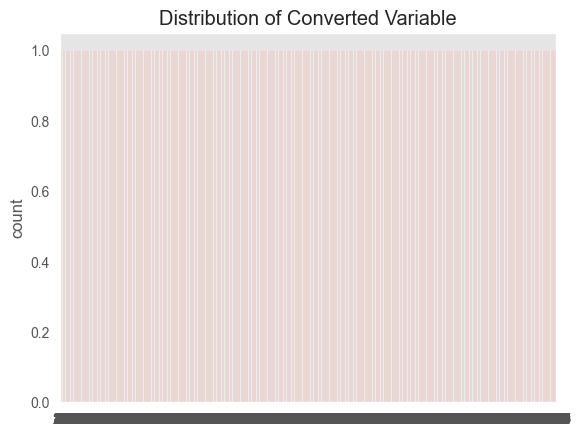

In [248]:
#Plotting count plot to get clear view of data distribution of 'Converted' column:-

sns.countplot(lead_df1.Converted)
plt.title("Distribution of Converted Variable")
plt.show()

In [249]:
#Checking ratio of imbalance:-

(lead_df1.Converted==1).sum()/(lead_df1.Converted==0).sum()

0.6270470153195985

### Observation
From value count and count plot we can see that data is properly balanced with respect to ratio.

In [250]:
# Again checking data types of remaining columns:-

lead_df1.dtypes

Lead Origin                                object
Lead Source                                object
Do Not Email                               object
Converted                                   int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                              object
Specialization                             object
What is your current occupation            object
A free copy of Mastering The Interview     object
dtype: object

<font color='blue'>Analyzing Categorical Variables</font>

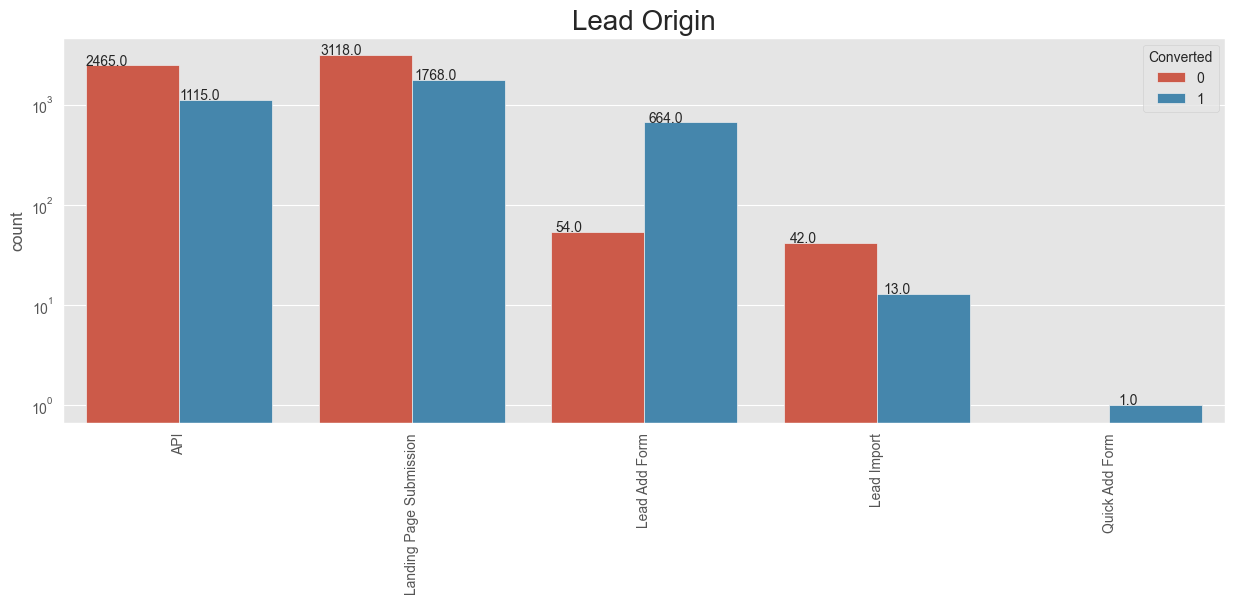

In [251]:
# Plotting count plot of 'Lead Origin' for both 'Converted' 0 and 1 :-

plt.figure(figsize = (15,5))

ax=sns.countplot(x = "Lead Origin", hue = "Converted", data = lead_df1)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel=None)

plt.xticks(rotation = 90)
plt.title('Lead Origin',fontsize=20)
ax.set_yscale('log')

plt.show()

### Observation 
From above plot we can observe and calculate that :

- Conversion rate for 'API' is ~ 31% and for 'Landing Page Submission' is ~36%.
- For 'Lead Add Form' number of conversion is more than unsuccessful conversion.
- Count of 'Lead Import' is lesser.

#### Recommendation
To improve overall lead conversion rate, we need to focus more on improving lead conversion of API and Landing Page Submission origin and generate more leads from Lead Add Form

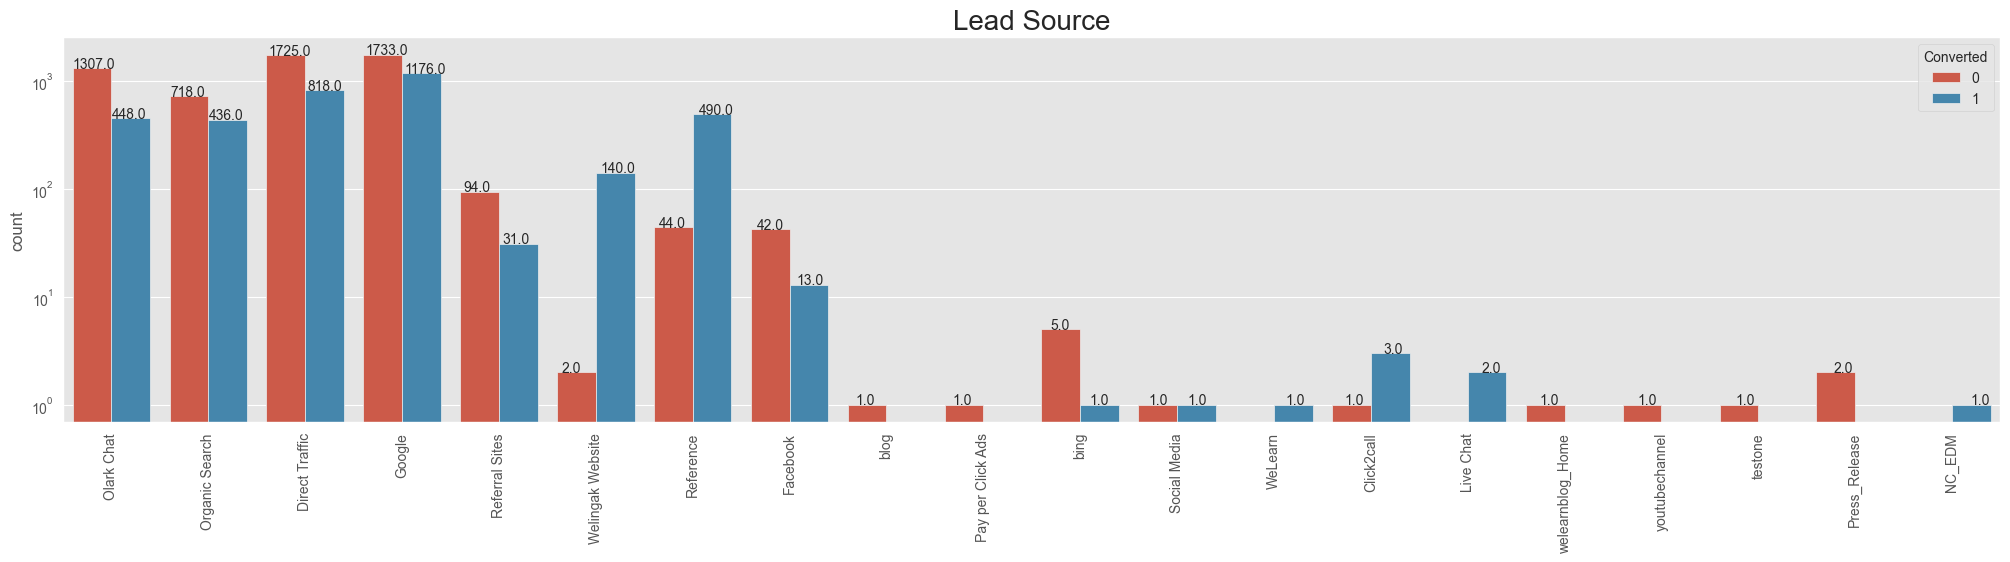

In [252]:
# Plotting count plot of 'Lead Source' based on 'Converted' value 0 and 1 :-

plt.figure(figsize = (25,5))

ax=sns.countplot(x = "Lead Source", hue = "Converted", data = lead_df1)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel=None)

plt.xticks(rotation = 90)
plt.title('Lead Source',fontsize=20)

ax.set_yscale('log')# Setting logrithmic scale

plt.show()

#### Clubbing lower frequency values together under a common label 'Others'

In [253]:
# Combining all low frequency values together:-

lead_df1['Lead Source'] = lead_df1['Lead Source'].replace(['blog','Pay per Click Ads','bing','Social Media','WeLearn','Click2call', 'Live Chat','welearnblog_Home', 'youtubechannel','testone',
                                                           'Press_Release','NC_EDM'], 'Others')

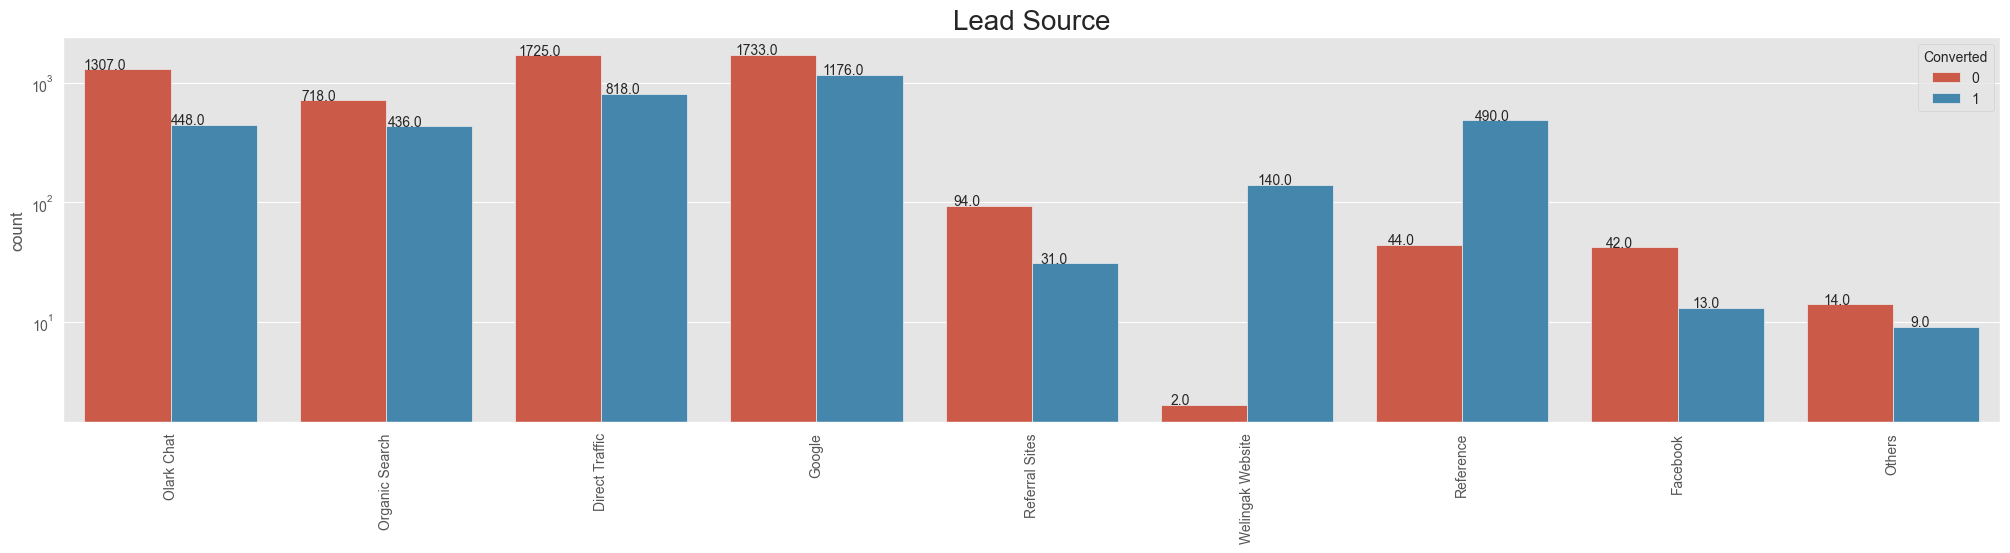

In [254]:
# Again plotting count plot of 'Lead Source' based on 'Converted' value 0 and 1 :-

plt.figure(figsize = (25,5))

ax=sns.countplot(x = "Lead Source", hue = "Converted", data = lead_df1)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel=None)

plt.xticks(rotation = 90)
plt.title('Lead Source',fontsize=20)

ax.set_yscale('log')

plt.show()

### Observation
From above plot we can observe:
- Google and Direct traffic generates maximum number of leads.
- Conversion rate of 'Reference' and 'Welingak Website' leads is high.
#### Recommendation
To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

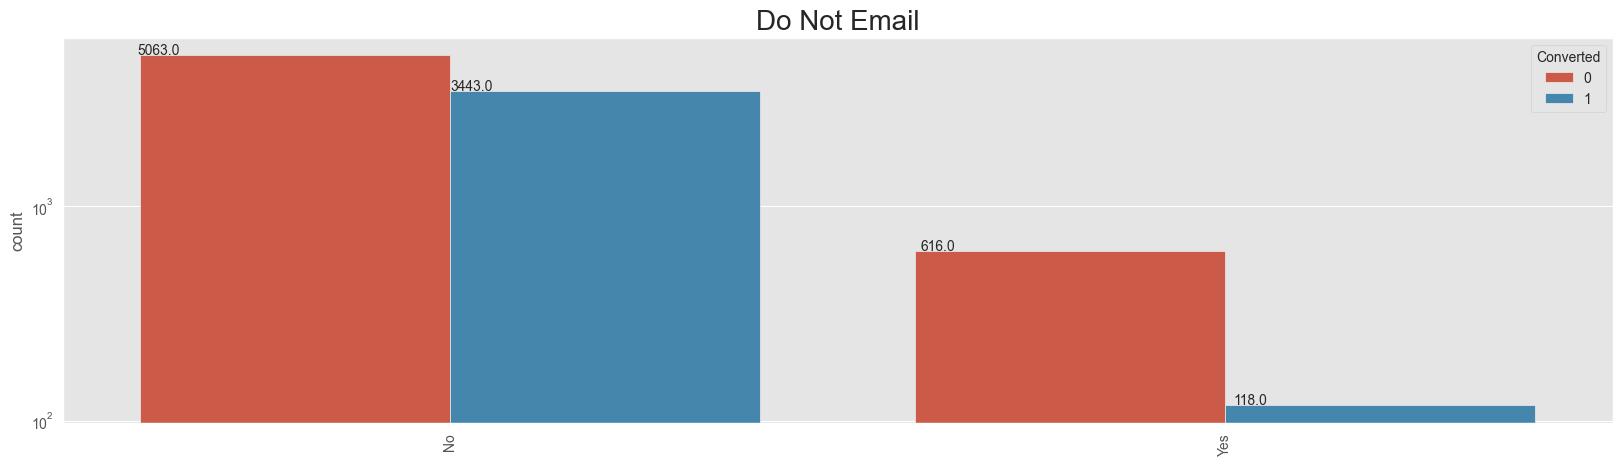

In [255]:
# Plotting count plot of 'Lead Source' based on 'Converted' value 0 and 1 :-

plt.figure(figsize = (20,5))

ax=sns.countplot(x = "Do Not Email", hue = "Converted", data = lead_df1)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel=None)

plt.xticks(rotation = 90)
plt.title('Do Not Email',fontsize=20)

ax.set_yscale('log')# Setting logrithmic scale

plt.show()

### Observation
- People who opted for mail option are becoming more leads.

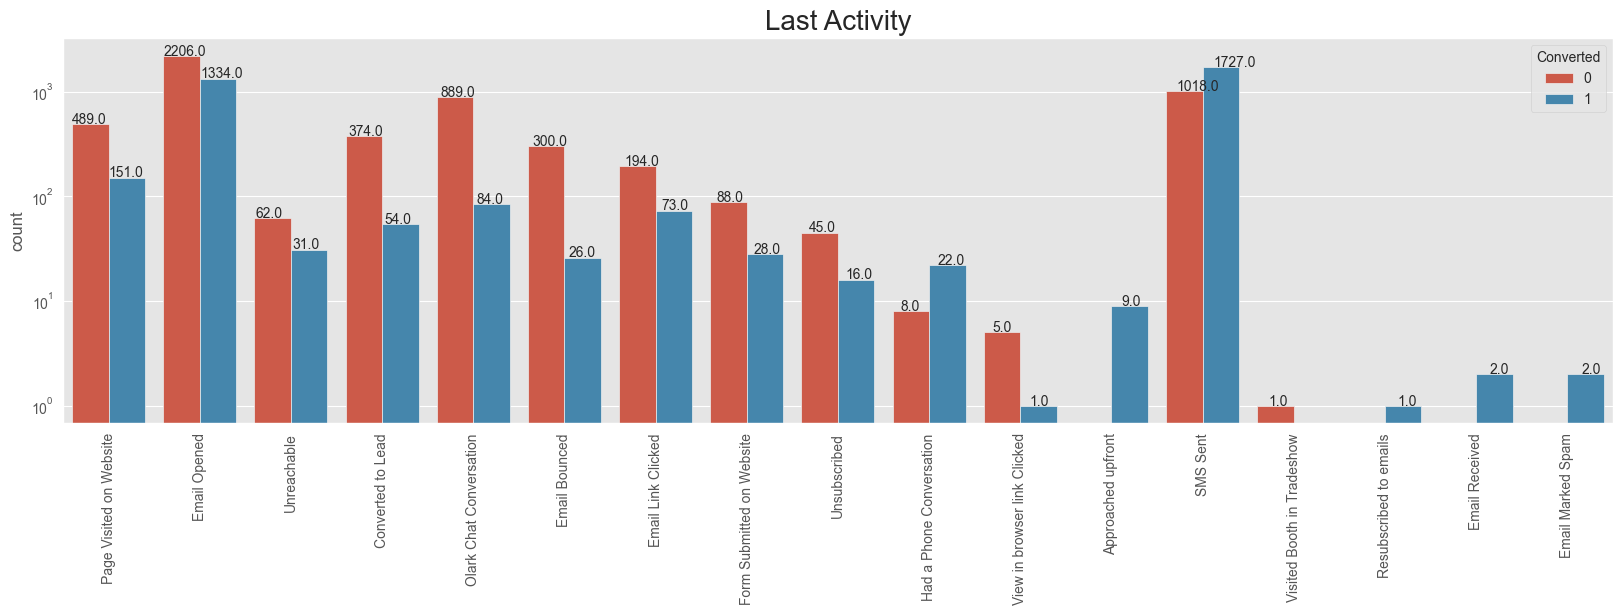

In [256]:
# Plotting count plot of 'Lead Source' based on 'Converted' value 0 and 1 :-

plt.figure(figsize = (20,5))

ax=sns.countplot(x = "Last Activity", hue = "Converted", data = lead_df1)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel=None)

plt.xticks(rotation = 90)
plt.title('Last Activity',fontsize=20)

ax.set_yscale('log')# Setting logrithmic scale

plt.show()

In [257]:
# Combining all low frequency values together under label 'Others':-

lead_df1['Last Activity'] = lead_df1['Last Activity'].replace(['Had a Phone Conversation','View in browser link Clicked','Visited Booth in Tradeshow',
      'Approached upfront','Resubscribed to emails','Email Received','Email Marked Spam'],'Others')

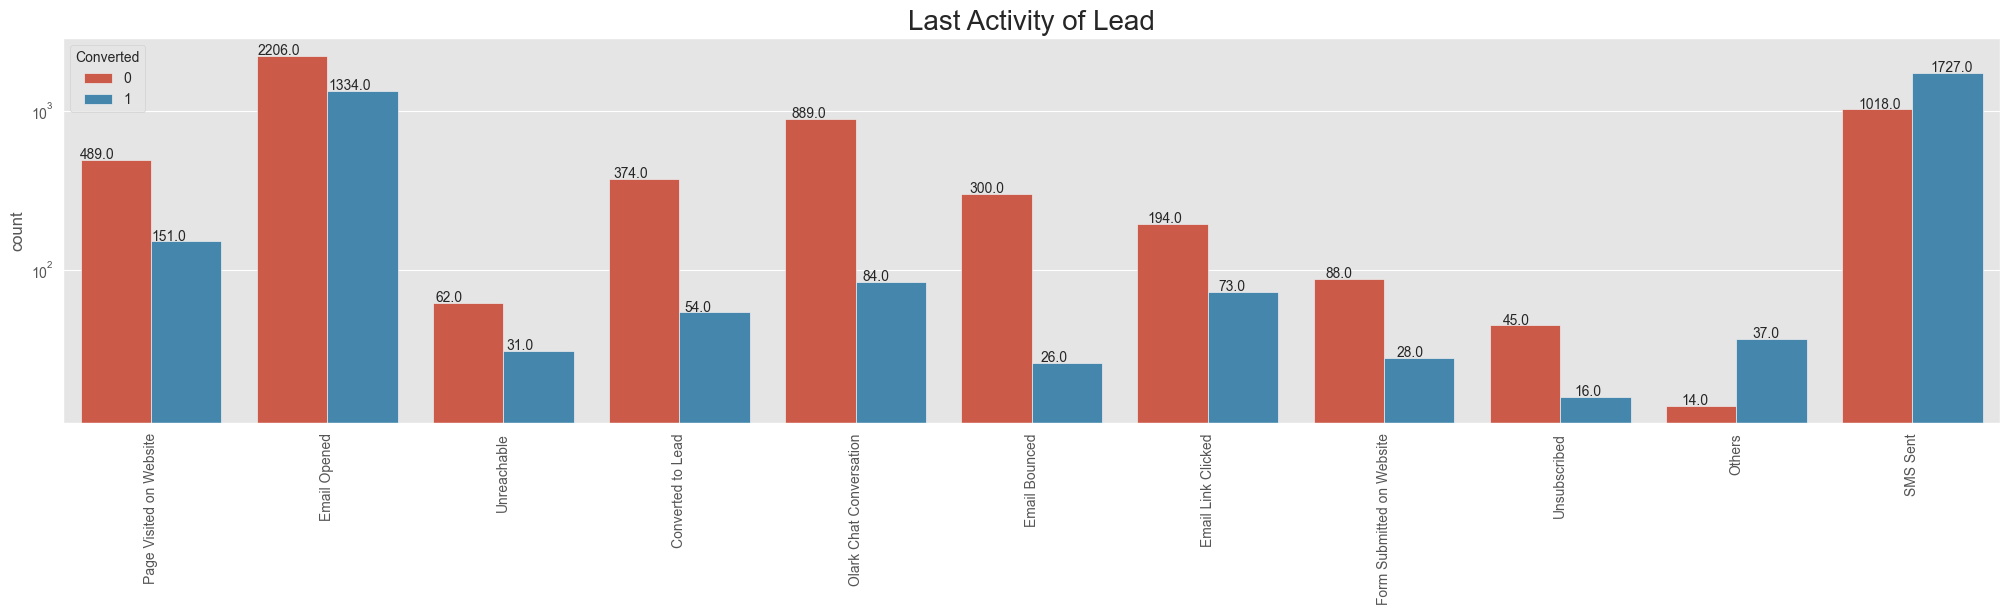

In [258]:
# Again plotting count plot of 'Last Activity' based on 'Converted' value 0 and 1 :-

plt.figure(figsize = (25,5))

ax=sns.countplot(x = "Last Activity", hue = "Converted", data = lead_df1)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel=None)

plt.xticks(rotation = 90)
plt.title('Last Activity of Lead',fontsize=20)

ax.set_yscale('log')

plt.show()

### Observation
From above plot we can observe :
- Conversion rate for last activity of 'SMS Sent'is ~63%.
- Highest last activity of leads is 'Email Opened' .

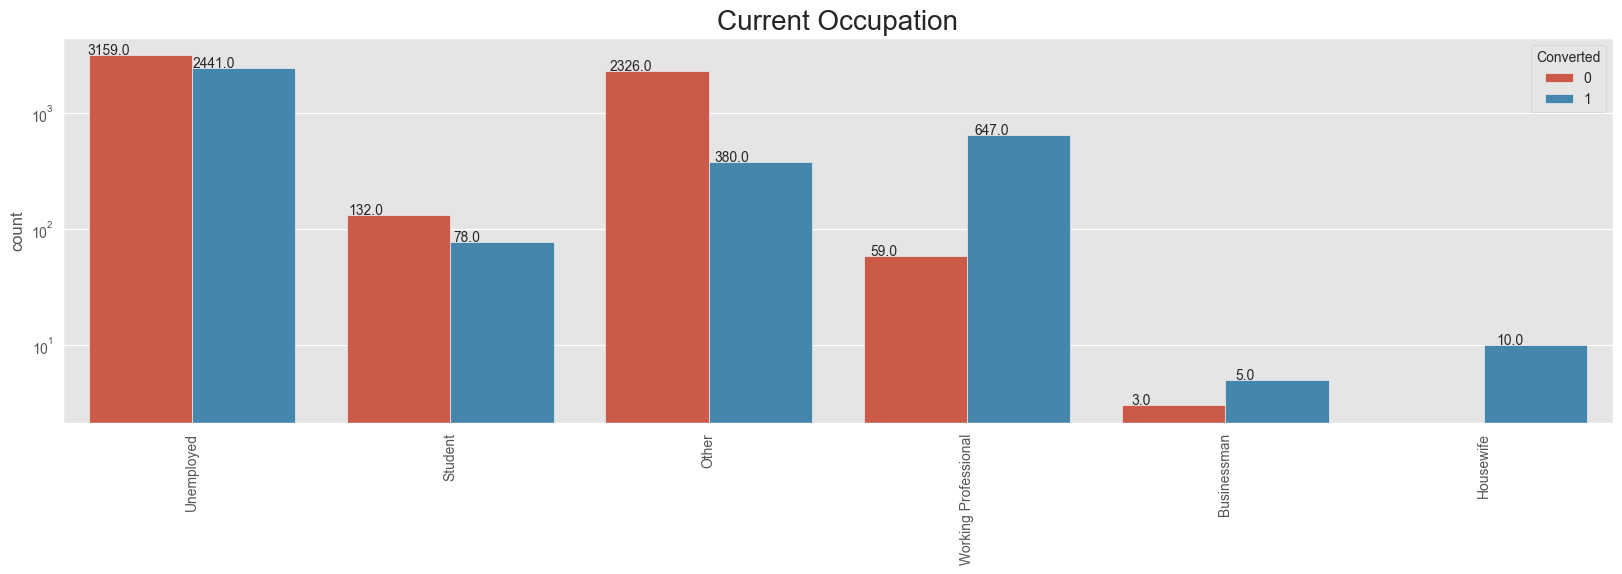

In [259]:
# Plotting count plot of 'What is your current occupation' based on 'Converted' value 0 and 1 :-

plt.figure(figsize = (20,5))

ax=sns.countplot(x = "What is your current occupation", hue = "Converted", data = lead_df1)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel=None)

plt.xticks(rotation = 90)
plt.title('Current Occupation',fontsize=20)

ax.set_yscale('log')# Setting logrithmic scale

plt.show()

### Observation

- 'Unemployed' leads are generationg more number of leads and having ~45% conversion rate.
- Conversion rate is higher for 'Working Professionals' .

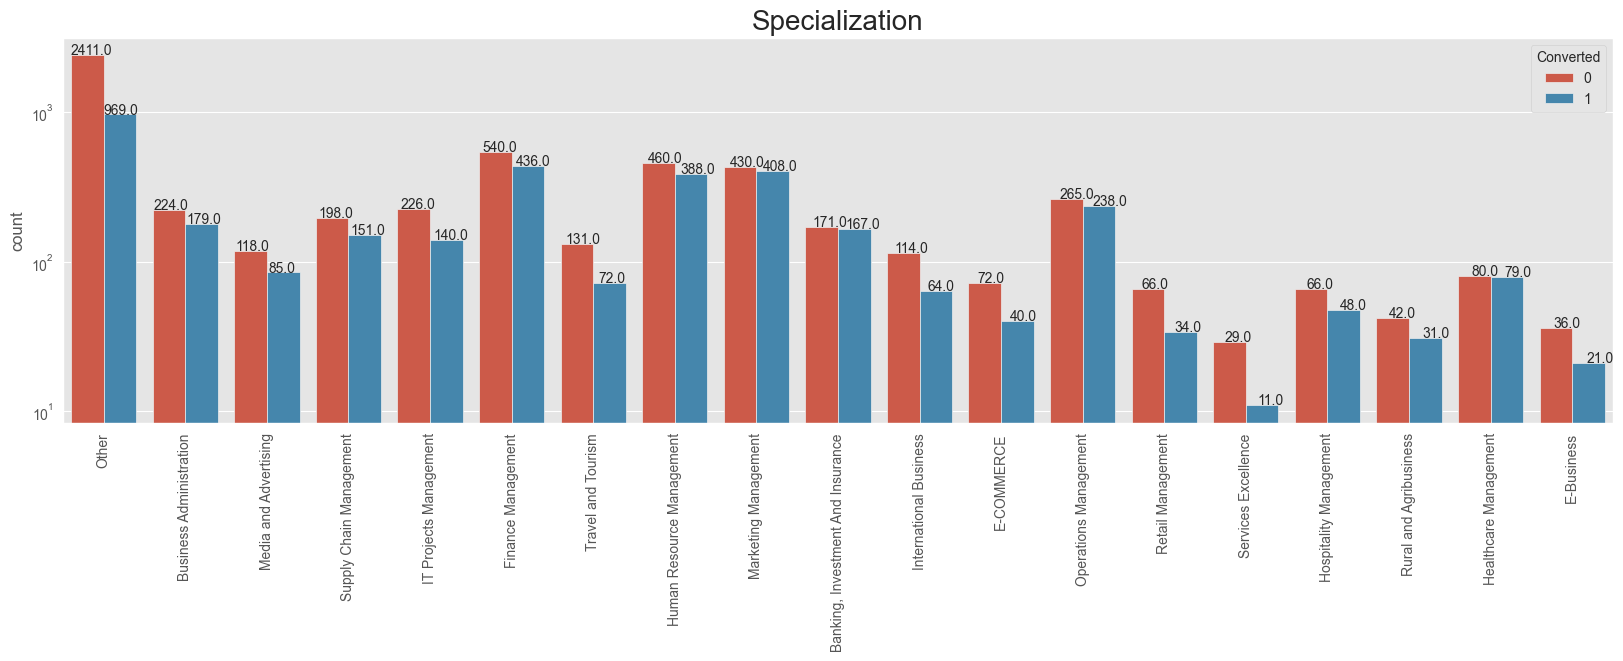

In [260]:
# Plotting count plot of 'Specialization' based on 'Converted' value 0 and 1 :-

plt.figure(figsize = (20,5))

ax=sns.countplot(x = "Specialization", hue = "Converted", data = lead_df1)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel=None)

plt.xticks(rotation = 90)
plt.title('Specialization',fontsize=20)

ax.set_yscale('log')# Setting logrithmic scale

plt.show()

### Observation

We can observe from above count plot of 'Specialization' that 'Management' specialization altogether having more number of leads generating.And Other category is also generating more number of leads.

<font color='blue'>Analyzing Numerical Variables</font>

### Outlier Analysis and treatment

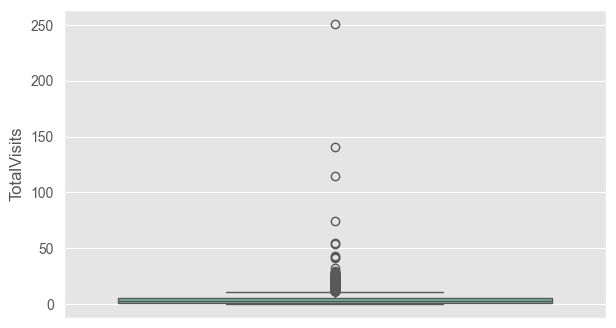

In [261]:
# Plotting box plots to visualize data distribution of 'TotalVisits':-

plt.figure(figsize = (7,4))
sns.boxplot(lead_df1['TotalVisits'],orient='v',palette='Set2')

plt.show()

### Observation
We can see from above box plot that only upper range outliers are present in data, so need to treat outliers.

In [262]:
# Treating outliers by capping upper range to 0.99:-

Q3 = lead_df1.TotalVisits.quantile(0.99)

lead_df1 = lead_df1[(lead_df1.TotalVisits <= Q3)]

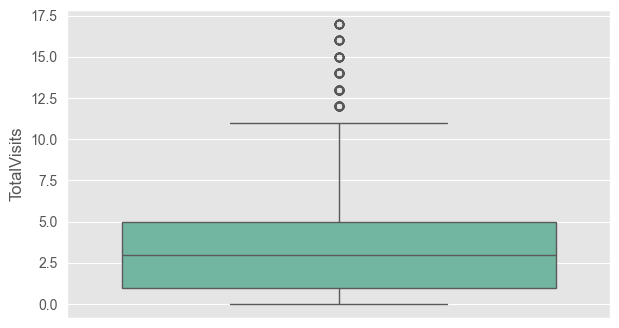

In [263]:
# Verifying outliers after removing it :-

plt.figure(figsize = (7,4))
sns.boxplot(y=lead_df1['TotalVisits'],palette='Set2')
plt.show()

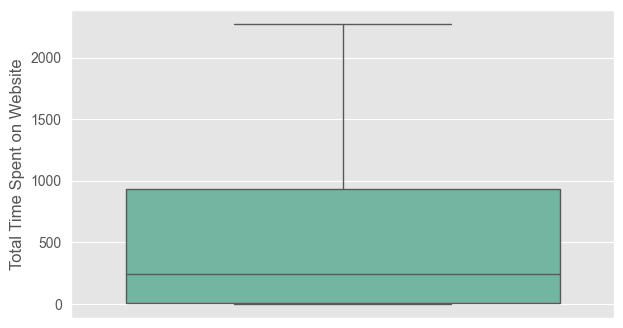

In [264]:
# Plotting box plots to visualize data distribution of 'Total Time Spent on Website':-

plt.figure(figsize=(7,4))
sns.boxplot(y=lead_df1['Total Time Spent on Website'],orient='v',palette='Set2')
plt.show()

### Observation
From above box plot we can see that there is no outlier in data,so no trreatment required for it.

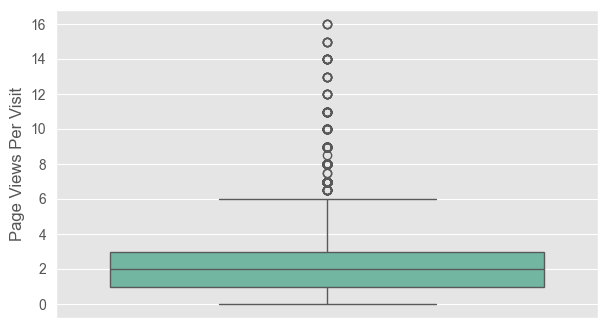

In [265]:
# Plotting box plots to visualize data distribution of 'Page Views Per Visit':-

plt.figure(figsize=(7,4))
sns.boxplot(y=lead_df1['Page Views Per Visit'],orient='v',palette='Set2')
plt.show()

### Observation
We can see from above box plot that only upper range outliers are present in data, so need to lower range treat outliers.

In [266]:
# Treating upper range outliers by capping upper range to 0.99:-

Q3 = lead_df1['Page Views Per Visit'].quantile(0.99)

lead_df1 = lead_df1[(lead_df1['Page Views Per Visit'] <= Q3)]

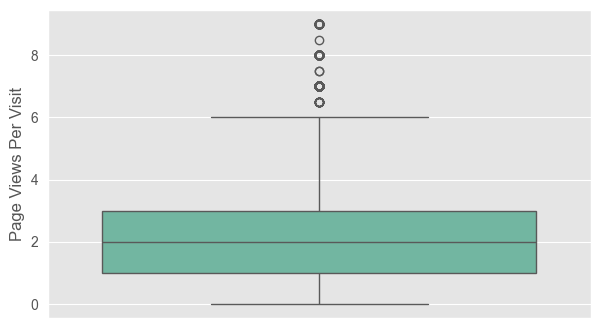

In [267]:
# Verifying outliers after removing it :-

plt.figure(figsize = (7,4))
sns.boxplot(y=lead_df1['Page Views Per Visit'],palette='Set2')
plt.show()

### Bivariate Analysis

In [272]:
lead_df1.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0         0.00                            0                  0.00   
1         5.00                          674                  2.50   
2         2.00                         1532                  2.00   
3         1.00                          305                  1.00   
4         2.00                         1428                  1.00   

             Last Activity           Specialization  \
0  Page Visited on Website                    Other   
1             Email Opened                    Other   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                    Other   

  What is your current occupation A free copy of Mastering The Interview  
0                      Unemployed                                     No  
1                      Unemployed                                     No  
2                         Student                                    Yes  
3                      Unemployed                                     No  
4                      Unemployed                                     No

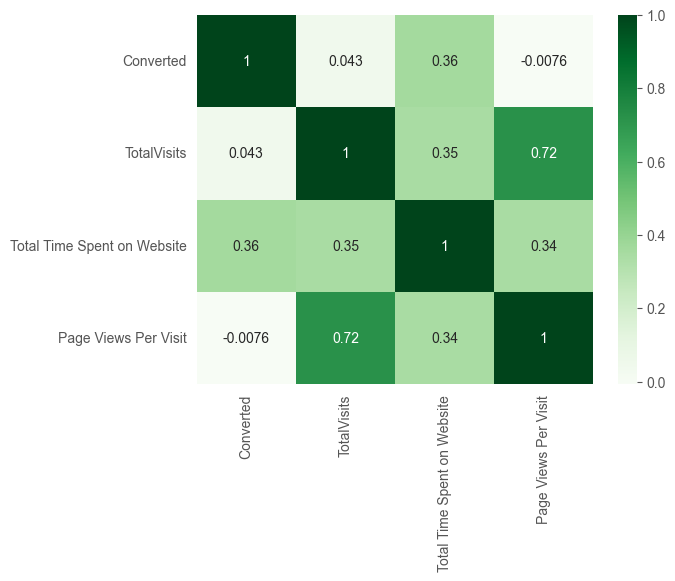

In [273]:
# Heatmap to understand the attributes correlation:-
       
ax = sns.heatmap(lead_df1[['Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit']].corr(),cmap='Greens',annot = True)
plt.show()

### Observation

- 'TotalVisits' and 'Page Views per Visit' are highly correlated with correlation of .72
- 'Total Time Spent on Website' has correlation of 0.36 with target variable 'Converted'.

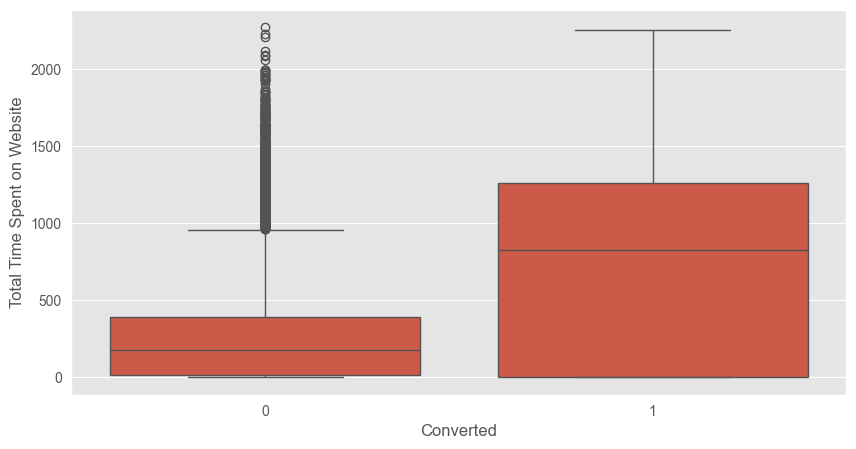

In [274]:
# Plotting box plot of "Total Time Spent on Website" vs Converted variable to check data distribution:-

plt.figure(figsize=(10,5))
sns.boxplot(x='Converted', y='Total Time Spent on Website',data=lead_df1)
plt.show()

### Observation
Leads spending more time on website are  more likely to opt for curses or converted.

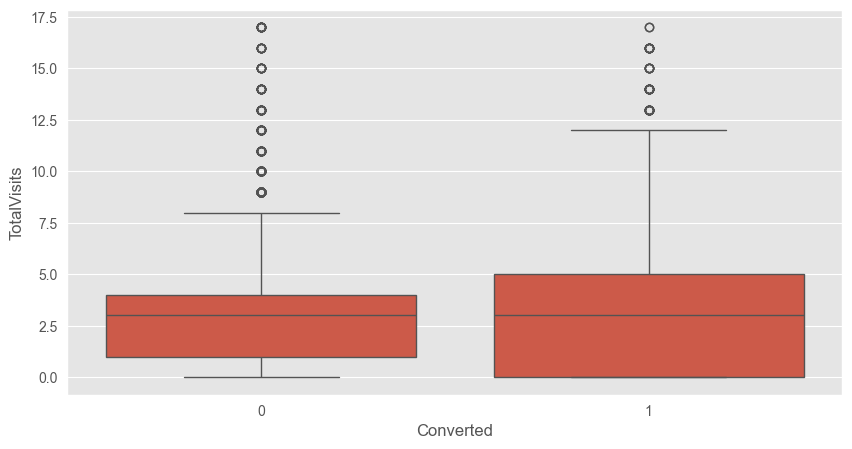

In [275]:
# Plotting box of "Total Visits" vs Converted variable to check data distribution:-

plt.figure(figsize=(10,5))
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_df1)
plt.show()

### Observation
From above plot we can see that median for converted and non-converted is approx same.

## Step 4: Data Preparation

#### Converting some binary variables (Yes/No) to 0/1

In [276]:
# Variable to map:-

var =  ['Do Not Email','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the variable:-

lead_df1[var] = lead_df1[var].apply(binary_map)

In [277]:
# Checking head of dataframe again:-

lead_df1.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0         0.00                            0                  0.00   
1         5.00                          674                  2.50   
2         2.00                         1532                  2.00   
3         1.00                          305                  1.00   
4         2.00                         1428                  1.00   

             Last Activity           Specialization  \
0  Page Visited on Website                    Other   
1             Email Opened                    Other   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                    Other   

  What is your current occupation  A free copy of Mastering The Interview  
0                      Unemployed                                       0  
1                      Unemployed                                       0  
2                         Student                                       1  
3                      Unemployed                                       0  
4                      Unemployed                                       0

### Creating Dummy Variable

#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [278]:
# Creating list 'cat_col' of categorical columns :-

cat_col= lead_df1.select_dtypes(include=['object']).columns
cat_col

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation'],
      dtype='object')

In [279]:
# Creating dummy variable for some of the categorical variables and dropping the first one using 'drop_first=True':-

dummy = pd.get_dummies(lead_df1[['Lead Origin', 'Lead Source', 'Last Activity','What is your current occupation',
                             'Specialization']], drop_first=True)

dummy.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                False                      False   
1                                False                      False   
2                                 True                      False   
3                                 True                      False   
4                                 True                      False   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Facebook  \
0                    False                       False                 False   
1                    False                       False                 False   
2                    False                       False                 False   
3                    False                       False                 False   
4                    False                       False                 False   

   Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
0               False                    True                       False   
1               False                   False                        True   
2               False                   False                       False   
3               False                   False                       False   
4                True                   False                       False   

   Lead Source_Others  Lead Source_Reference  ...  \
0               False                  False  ...   
1               False                  False  ...   
2               False                  False  ...   
3               False                  False  ...   
4               False                  False  ...   

   Specialization_International Business  Specialization_Marketing Management  \
0                                  False                                False   
1                                  False                                False   
2                                  False                                False   
3                                  False                                False   
4                                  False                                False   

   Specialization_Media and Advertising  Specialization_Operations Management  \
0                                 False                                 False   
1                                 False                                 False   
2                                 False                                 False   
3                                  True                                 False   
4                                 False                                 False   

   Specialization_Other  Specialization_Retail Management  \
0                  True                             False   
1                  True                             False   
2                 False                             False   
3                 False                             False   
4                  True                             False   

   Specialization_Rural and Agribusiness  Specialization_Services Excellence  \
0                                  False                               False   
1                                  False                               False   
2                                  False                               False   
3                                  False                               False   
4                                  False                               False   

   Specialization_Supply Chain Management  Specialization_Travel and Tourism  
0                                   False                              False  
1                                   False                              False  
2                                   False                              False  
3                                   False                              False  
4                                   False                              False  

[5 rows x 45 columns]

In [280]:
# Adding dummy variables dataset 'dummy' to original dataset 'lead_df1':-

lead_df1= pd.concat([dummy,lead_df1],axis = 1)

In [281]:
#Checking head of dataframe 'lead_df1':-

lead_df1.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                False                      False   
1                                False                      False   
2                                 True                      False   
3                                 True                      False   
4                                 True                      False   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Facebook  \
0                    False                       False                 False   
1                    False                       False                 False   
2                    False                       False                 False   
3                    False                       False                 False   
4                    False                       False                 False   

   Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
0               False                    True                       False   
1               False                   False                        True   
2               False                   False                       False   
3               False                   False                       False   
4                True                   False                       False   

   Lead Source_Others  Lead Source_Reference  ...     Lead Source  \
0               False                  False  ...      Olark Chat   
1               False                  False  ...  Organic Search   
2               False                  False  ...  Direct Traffic   
3               False                  False  ...  Direct Traffic   
4               False                  False  ...          Google   

   Do Not Email  Converted  TotalVisits  Total Time Spent on Website  \
0             0          0         0.00                            0   
1             0          0         5.00                          674   
2             0          1         2.00                         1532   
3             0          0         1.00                          305   
4             0          1         2.00                         1428   

   Page Views Per Visit            Last Activity           Specialization  \
0                  0.00  Page Visited on Website                    Other   
1                  2.50             Email Opened                    Other   
2                  2.00             Email Opened  Business Administration   
3                  1.00              Unreachable    Media and Advertising   
4                  1.00        Converted to Lead                    Other   

   What is your current occupation  A free copy of Mastering The Interview  
0                       Unemployed                                       0  
1                       Unemployed                                       0  
2                          Student                                       1  
3                       Unemployed                                       0  
4                       Unemployed                                       0  

[5 rows x 56 columns]

In [282]:
# Dropping repeated columns for which dummy variables were created:-

lead_df1.drop(columns=['Lead Origin', 'Lead Source', 'Last Activity','What is your current occupation','Specialization'
                             ],inplace = True)

In [283]:
# Checking shape of 'lead_df1' dataframe:-

lead_df1.shape

(9090, 51)

In [284]:
# Checking data types column wise again:-

lead_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9090 entries, 0 to 9239
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Origin_Landing Page Submission                   9090 non-null   bool   
 1   Lead Origin_Lead Add Form                             9090 non-null   bool   
 2   Lead Origin_Lead Import                               9090 non-null   bool   
 3   Lead Origin_Quick Add Form                            9090 non-null   bool   
 4   Lead Source_Facebook                                  9090 non-null   bool   
 5   Lead Source_Google                                    9090 non-null   bool   
 6   Lead Source_Olark Chat                                9090 non-null   bool   
 7   Lead Source_Organic Search                            9090 non-null   bool   
 8   Lead Source_Others                                    9090 non-

## Step 5: Test-Train Split

In [285]:
# Importing required library to split data:-

from sklearn.model_selection import train_test_split

In [286]:
# Putting feature variable to X:-

X = lead_df1.drop(['Converted'], axis=1)

# Displaying head :-

X.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                False                      False   
1                                False                      False   
2                                 True                      False   
3                                 True                      False   
4                                 True                      False   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Facebook  \
0                    False                       False                 False   
1                    False                       False                 False   
2                    False                       False                 False   
3                    False                       False                 False   
4                    False                       False                 False   

   Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
0               False                    True                       False   
1               False                   False                        True   
2               False                   False                       False   
3               False                   False                       False   
4                True                   False                       False   

   Lead Source_Others  Lead Source_Reference  ...  \
0               False                  False  ...   
1               False                  False  ...   
2               False                  False  ...   
3               False                  False  ...   
4               False                  False  ...   

   Specialization_Retail Management  Specialization_Rural and Agribusiness  \
0                             False                                  False   
1                             False                                  False   
2                             False                                  False   
3                             False                                  False   
4                             False                                  False   

   Specialization_Services Excellence  Specialization_Supply Chain Management  \
0                               False                                   False   
1                               False                                   False   
2                               False                                   False   
3                               False                                   False   
4                               False                                   False   

   Specialization_Travel and Tourism  Do Not Email  TotalVisits  \
0                              False             0         0.00   
1                              False             0         5.00   
2                              False             0         2.00   
3                              False             0         1.00   
4                              False             0         2.00   

   Total Time Spent on Website  Page Views Per Visit  \
0                            0                  0.00   
1                          674                  2.50   
2                         1532                  2.00   
3                          305                  1.00   
4                         1428                  1.00   

   A free copy of Mastering The Interview  
0                                       0  
1                                       0  
2                                       1  
3                                       0  
4                                       0  

[5 rows x 50 columns]

In [287]:
# Putting response variable to y:-

y = lead_df1['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [288]:
# Splitting the data into train and test of 70:30 ratio:-

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [289]:
# Checking shape of 'X_train' dataset after splitting:-

X_train.shape

(6363, 50)

In [290]:
# Checking shape of 'X_test' dataset after splitting:-

X_test.shape

(2727, 50)

In [291]:
# Verifying info of data set after splitting:-

lead_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9090 entries, 0 to 9239
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Origin_Landing Page Submission                   9090 non-null   bool   
 1   Lead Origin_Lead Add Form                             9090 non-null   bool   
 2   Lead Origin_Lead Import                               9090 non-null   bool   
 3   Lead Origin_Quick Add Form                            9090 non-null   bool   
 4   Lead Source_Facebook                                  9090 non-null   bool   
 5   Lead Source_Google                                    9090 non-null   bool   
 6   Lead Source_Olark Chat                                9090 non-null   bool   
 7   Lead Source_Organic Search                            9090 non-null   bool   
 8   Lead Source_Others                                    9090 non-

## Step 6: Feature Scaling

We are using 'StandardScaler' here for scaling.

In [292]:
##Importing required library for scaling :-

from sklearn.preprocessing import StandardScaler

In [293]:
# Creating 'scaler' object for 'StandardScaler':-

scaler = StandardScaler()

# Applying 'fit_transform' to scale the 'train' data set:-

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

# Displaying the head of the data after scaling:-
X_train.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
302                                 False                      False   
6087                                False                      False   
1033                                False                      False   
7656                                 True                      False   
3241                                 True                      False   

      Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
302                     False                       False   
6087                    False                       False   
1033                    False                       False   
7656                    False                       False   
3241                    False                       False   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Olark Chat  \
302                  False               False                   False   
6087                 False               False                    True   
1033                 False                True                   False   
7656                 False               False                   False   
3241                 False               False                   False   

      Lead Source_Organic Search  Lead Source_Others  Lead Source_Reference  \
302                        False               False                  False   
6087                       False               False                  False   
1033                       False               False                  False   
7656                       False               False                  False   
3241                       False               False                  False   

      ...  Specialization_Retail Management  \
302   ...                             False   
6087  ...                             False   
1033  ...                             False   
7656  ...                             False   
3241  ...                             False   

      Specialization_Rural and Agribusiness  \
302                                   False   
6087                                  False   
1033                                  False   
7656                                  False   
3241                                  False   

      Specialization_Services Excellence  \
302                                False   
6087                               False   
1033                               False   
7656                               False   
3241                               False   

      Specialization_Supply Chain Management  \
302                                    False   
6087                                   False   
1033                                   False   
7656                                   False   
3241                                   False   

      Specialization_Travel and Tourism  Do Not Email  TotalVisits  \
302                               False             0         1.34   
6087                              False             1        -1.09   
1033                              False             0         0.64   
7656                              False             1         0.99   
3241                              False             0         0.29   

      Total Time Spent on Website  Page Views Per Visit  \
302                         -0.43                  0.04   
6087                        -0.89                 -1.21   
1033                        -0.03                  1.48   
7656                        -0.24                  2.01   
3241                         0.90                 -0.49   

      A free copy of Mastering The Interview  
302                                        0  
6087                                       0  
1033                                       0  
7656                                       1  
3241                                       1  

[5 rows x 50 columns]

#### Checking the Correlation Matrix

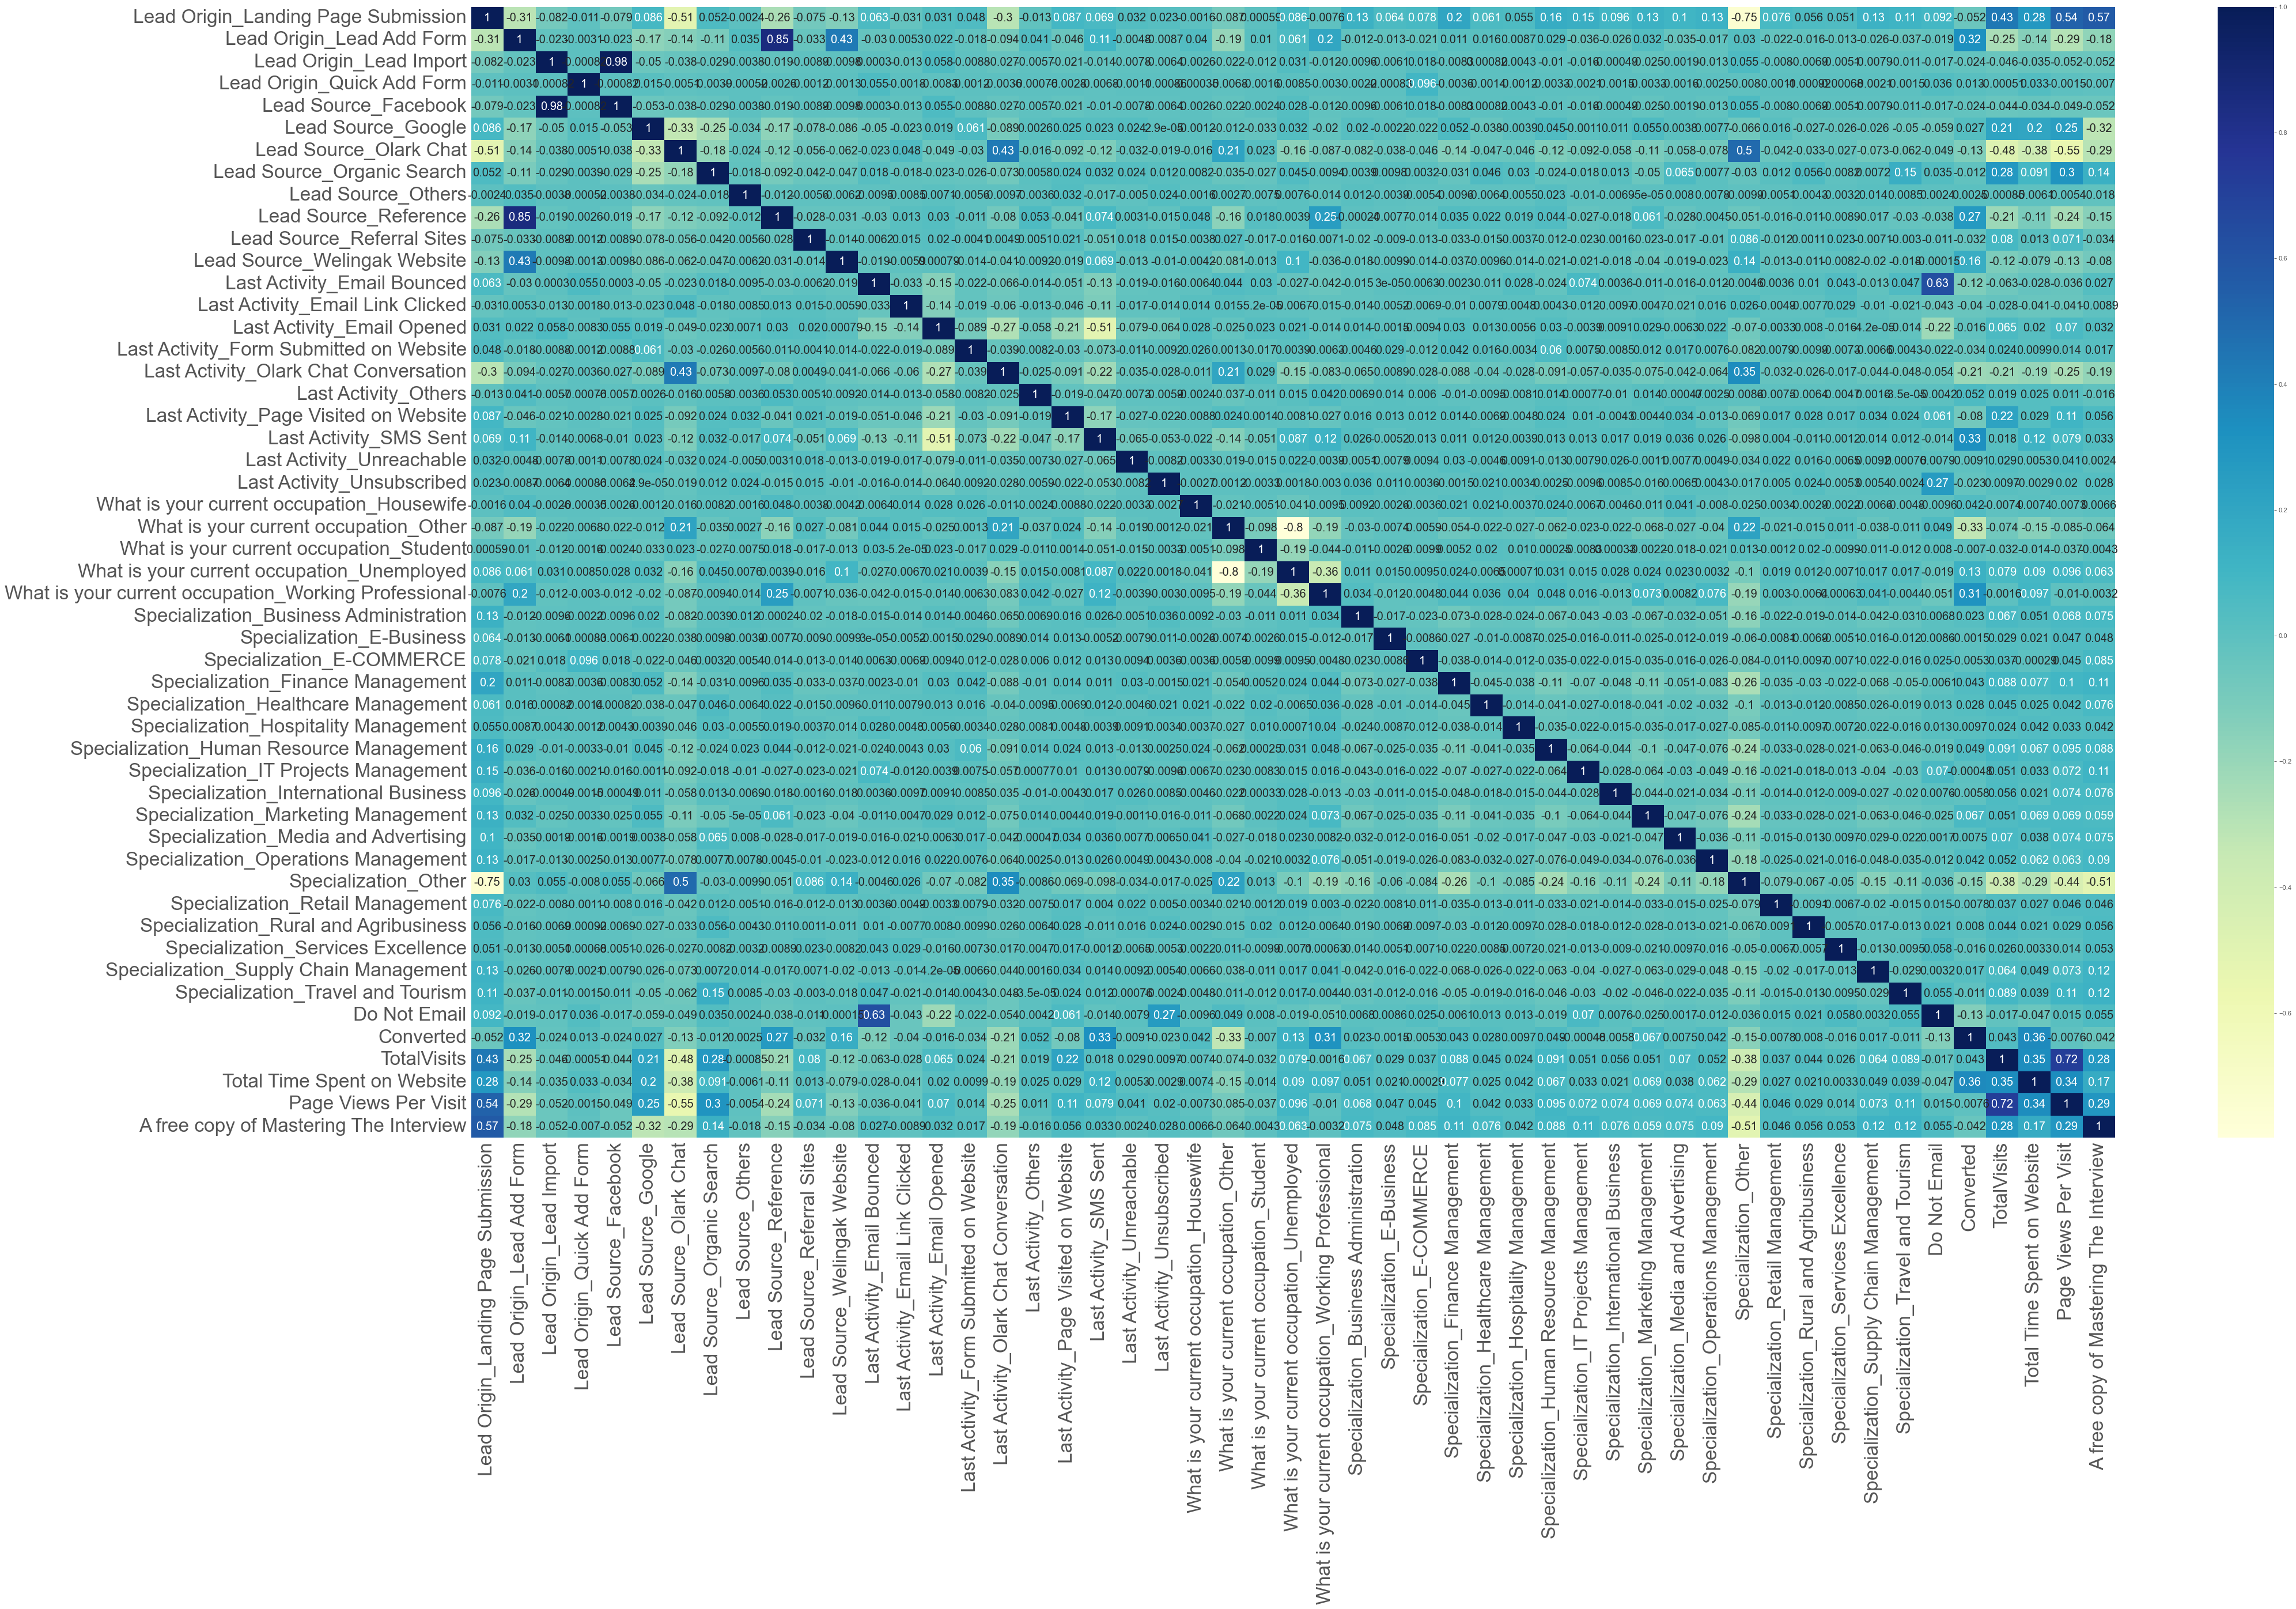

In [294]:
# Let's check the correlation coefficients to see which variables are highly correlated:-

plt.figure(figsize = (55, 35),dpi=80)
sns.heatmap(lead_df1.corr(), annot = True, cmap="YlGnBu",annot_kws={"size": 18})
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.tight_layout()
plt.show()

### Observation

The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable. - We will refer this map for building the logistic model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model.
From above heatmap we can see that:- 
- 'Lead Source_Facebook' and 'Lead Origin_Lead Import' having higher correlation of 0.98.
- 'Do Not Email' and 'Last Activity_Email Bounced' having higher correlation.
- 'Lead Origin_Lead Add Form' and 'Lead Source_Referance' having higher correlation of 0.85.
- 'TotalVisits' and 'Page Views Per Visit' having correlation of 0.72.
- 'Lead Origin_Lead Add Form' ,'Lead Source_Welingak Website', 'Last Activity_SMS Sent' and 'What is your current Occupation_Working Professionals' having positive correlation with our target variable 'Converted'.

## Step 7: Model Building

In [295]:
#Importing 'LogisticRegression' :-

from sklearn.linear_model import LogisticRegression

# Creating LogisticRegression Object called 'regressor':-

regressor = LogisticRegression()

### Using RFE for feature elimination

In [297]:
# Importing required library
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [299]:
# Define the regressor (replace LinearRegression with your desired regressor)
regressor = LinearRegression()
 
# Initialize RFE with the regressor and number of features to select
rfe = RFE(estimator=regressor, n_features_to_select=15)
 
# Fit the RFE model
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [300]:
#Displaying columns selected by RFE and their weights:-

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Lead Origin_Landing Page Submission', False, 4),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Origin_Quick Add Form', True, 1),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 14),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 33),
 ('Lead Source_Others', False, 7),
 ('Lead Source_Reference', False, 2),
 ('Lead Source_Referral Sites', False, 16),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 10),
 ('Last Activity_Email Link Clicked', False, 12),
 ('Last Activity_Email Opened', False, 5),
 ('Last Activity_Form Submitted on Website', False, 17),
 ('Last Activity_Olark Chat Conversation', False, 26),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 11),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', False, 6),
 ('Last Activity_Unsubscribed', True, 1),
 ('What is your current occupation_Housewife', T

In [301]:
# Storing columns selected by RFE into 'col' and displaying it:-

col = X_train.columns[rfe.support_]
col

Index(['Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Facebook',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed', 'Do Not Email',
       'Total Time Spent on Website'],
      dtype='object')

In [302]:
# Displaying columns which are not selected by RFE:-

X_train.columns[~rfe.support_]

Index(['Lead Origin_Landing Page Submission', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'What is your current occupation_Working Professional',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media a

In [303]:
# Creating X_test dataframe with RFE selected variables:-

X_train_rfe = X_train[col]

### Using manual feature elimination

#### Running First Training Model

### Model 1
Starting with all the columns selected by RFE .

In [304]:
#Importing required 'statsmodels' library:-

import statsmodels.api as sm

In [307]:
# Convert all columns to numeric, errors='coerce' converts invalid values to NaN
X_train_rfe = X_train_rfe.apply(pd.to_numeric, errors='coerce')
y_train = pd.to_numeric(y_train, errors='coerce')

In [308]:
# Drop rows with NaN values (or you can impute missing values if needed)
X_train_rfe = X_train_rfe.dropna()
y_train = y_train.dropna()

In [309]:
import numpy as np
 
X_train_rfe_np = np.asarray(X_train_rfe)
y_train_np = np.asarray(y_train)

In [314]:
print(X_train_rfe.dtypes)
print(y_train.dtypes)

Lead Origin_Lead Add Form                        bool
Lead Origin_Lead Import                          bool
Lead Origin_Quick Add Form                       bool
Lead Source_Facebook                             bool
Lead Source_Olark Chat                           bool
Lead Source_Welingak Website                     bool
Last Activity_Others                             bool
Last Activity_SMS Sent                           bool
Last Activity_Unsubscribed                       bool
What is your current occupation_Housewife        bool
What is your current occupation_Other            bool
What is your current occupation_Student          bool
What is your current occupation_Unemployed       bool
Do Not Email                                    int64
Total Time Spent on Website                   float64
dtype: object
int64


In [328]:
# Convert all boolean values in the DataFrame to integers (element-wise)
X_train_rfe = X_train_rfe.applymap(lambda x: int(x) if isinstance(x, bool) else x)
 
print(X_train_rfe)

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
302                           0                        0   
6087                          0                        0   
1033                          0                        0   
7656                          0                        0   
3241                          0                        0   
...                         ...                      ...   
360                           0                        0   
81                            1                        0   
8171                          0                        0   
7048                          0                        0   
5730                          0                        0   

      Lead Origin_Quick Add Form  Lead Source_Facebook  \
302                            0                     0   
6087                           0                     0   
1033                           0                     0   
7656                           0               

In [330]:
print(X_train_rfe.dtypes)
print(y_train.dtypes)

Lead Origin_Lead Add Form                       int64
Lead Origin_Lead Import                         int64
Lead Origin_Quick Add Form                      int64
Lead Source_Facebook                            int64
Lead Source_Olark Chat                          int64
Lead Source_Welingak Website                    int64
Last Activity_Others                            int64
Last Activity_SMS Sent                          int64
Last Activity_Unsubscribed                      int64
What is your current occupation_Housewife       int64
What is your current occupation_Other           int64
What is your current occupation_Student         int64
What is your current occupation_Unemployed      int64
Do Not Email                                    int64
Total Time Spent on Website                   float64
dtype: object
int64


In [331]:
print(y_train.dtypes)

int64


In [332]:
#Importing required 'statsmodels' library:-

import statsmodels.api as sm

In [333]:
# Convert all columns to numeric, coercing errors to NaN
X_train_rfe = X_train_rfe.apply(pd.to_numeric, errors='coerce')
y_train = pd.to_numeric(y_train, errors='coerce')

In [334]:
print(X_train_rfe.isna().sum())  # Check for NaN values
print(y_train.isna().sum())

Lead Origin_Lead Add Form                     0
Lead Origin_Lead Import                       0
Lead Origin_Quick Add Form                    0
Lead Source_Facebook                          0
Lead Source_Olark Chat                        0
Lead Source_Welingak Website                  0
Last Activity_Others                          0
Last Activity_SMS Sent                        0
Last Activity_Unsubscribed                    0
What is your current occupation_Housewife     0
What is your current occupation_Other         0
What is your current occupation_Student       0
What is your current occupation_Unemployed    0
Do Not Email                                  0
Total Time Spent on Website                   0
dtype: int64
0


In [335]:
# Drop rows with NaN values (or impute if necessary)
X_train_rfe = X_train_rfe.dropna()
y_train = y_train.dropna()

In [336]:
print(X_train_rfe.dtypes)
print(y_train.dtypes)

Lead Origin_Lead Add Form                       int64
Lead Origin_Lead Import                         int64
Lead Origin_Quick Add Form                      int64
Lead Source_Facebook                            int64
Lead Source_Olark Chat                          int64
Lead Source_Welingak Website                    int64
Last Activity_Others                            int64
Last Activity_SMS Sent                          int64
Last Activity_Unsubscribed                      int64
What is your current occupation_Housewife       int64
What is your current occupation_Other           int64
What is your current occupation_Student         int64
What is your current occupation_Unemployed      int64
Do Not Email                                    int64
Total Time Spent on Website                   float64
dtype: object
int64


In [337]:
import numpy as np
 
X_train_rfe_np = np.asarray(X_train_rfe)
y_train_np = np.asarray(y_train)
 
print(type(X_train_rfe_np), type(y_train_np))  # Ensure correct numpy types

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [338]:
print(X_train_rfe_np.shape, y_train_np.shape)  # Ensure dimensions align

(6363, 15) (6363,)


In [339]:
import statsmodels.api as sm
 
# Add constant for intercept
X_train_sm = sm.add_constant(X_train_rfe_np)
 
# Fit the GLM model with a Binomial family
logm1 = sm.GLM(y_train_np, X_train_sm, family=sm.families.Binomial()).fit()
print(logm1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6347
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2629.8
Date:                Tue, 22 Oct 2024   Deviance:                       5259.6
Time:                        08:53:09   Pearson chi2:                 6.64e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3953
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1727      0.178      6.594      0.0

In [340]:
import statsmodels.api as sm
 
# Add constant
X_train_sm = sm.add_constant(X_train_rfe_np)


# Fit the GLM model
logm1 = sm.GLM(y_train_np, X_train_sm, family=sm.families.Binomial()).fit()
print(logm1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6347
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2629.8
Date:                Tue, 22 Oct 2024   Deviance:                       5259.6
Time:                        08:53:25   Pearson chi2:                 6.64e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3953
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1727      0.178      6.594      0.0

In [341]:
# Add a constant to the model (for the intercept)
X_train_sm = sm.add_constant(X_train_rfe)
 
# Build the Generalized Linear Model (GLM) with a Binomial family
logm1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial()).fit()

### VIF Check for multicollinearity : variance_inflation_factor

In [342]:
# Creating dataframe called 'vif' containing names feature variables and their respective VIFs:-

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1                      Lead Origin_Lead Import 37.30
3                         Lead Source_Facebook 37.30
12  What is your current occupation_Unemployed  1.56
4                       Lead Source_Olark Chat  1.52
7                       Last Activity_SMS Sent  1.42
0                    Lead Origin_Lead Add Form  1.40
10       What is your current occupation_Other  1.33
5                 Lead Source_Welingak Website  1.27
14                 Total Time Spent on Website  1.24
13                                Do Not Email  1.19
8                   Last Activity_Unsubscribed  1.10
11     What is your current occupation_Student  1.03
6                         Last Activity_Others  1.01
2                   Lead Origin_Quick Add Form  1.00
9    What is your current occupation_Housewife  1.00

#### Dropping insignificant column and updating the model 

In [343]:
#Dropping 'What is your current occupation_Housewife' because of insignificant variable p-value=0.999(p>0.05):-

X_train_new = X_train_rfe.drop(["What is your current occupation_Housewife"], axis = 1)

### Model 2

In [344]:
# Add a constant:-

X_train_sm2 = sm.add_constant(X_train_new)

# Building second fitted model:-

logm2 = sm.GLM(y_train,X_train_sm2, family = sm.families.Binomial()).fit()

In [345]:
# Print a summary of the logistic regression model obtained:-

logm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6348
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2631.0
Date:                Tue, 22 Oct 2024   Deviance:                       5262.0
Time:                        08:54:46   Pearson chi2:                 6.67e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3951
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          1.2047      0.177      6.793      0.000       0.857       1.552
Lead Origin_Lead Add Form                      3.4090      0.197     17.310      0.000       3.023       3.795
Lead Origin_Lead Import                       20.2432   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Lead Origin_Quick Add Form                    19.9905   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Lead Source_Facebook                         -20.5331   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Source_Olark Chat                         1.0961      0.101     10.813      0.000       0.897       1.295
Lead Source_Welingak Website                   2.8515      1.027      2.775      0.006       0.838       4.865
Last Activity_Others                           1.4269      0.494      2.887      0.004       0.458       2.396
Last Activity_SMS Sent                         1.4975      0.074     20.178      0.000       1.352       1.643
Last Activity_Unsubscribed                     1.5588      0.453      3.443      0.001       0.671       2.446
What is your current occupation_Other         -3.7701      0.193    -19.535      0.000      -4.148      -3.392
What is your current occupation_Student       -2.5438      0.278     -9.161      0.000      -3.088      -2.000
What is your current occupation_Unemployed    -2.4832      0.180    -13.762      0.000      -2.837      -2.130
Do Not Email                                  -1.6107      0.182     -8.838      0.000      -1.968      -1.254
Total Time Spent on Website                    1.0897      0.040     27.134      0.000       1.011       1.168
==============================================================================================================
"""

In [346]:
# Calculating VIF for new model:-

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1                      Lead Origin_Lead Import 37.30
3                         Lead Source_Facebook 37.30
11  What is your current occupation_Unemployed  1.56
4                       Lead Source_Olark Chat  1.52
7                       Last Activity_SMS Sent  1.42
0                    Lead Origin_Lead Add Form  1.39
9        What is your current occupation_Other  1.33
5                 Lead Source_Welingak Website  1.27
13                 Total Time Spent on Website  1.24
12                                Do Not Email  1.19
8                   Last Activity_Unsubscribed  1.10
10     What is your current occupation_Student  1.03
6                         Last Activity_Others  1.01
2                   Lead Origin_Quick Add Form  1.00

#### Dropping insignificant column and updating the model

In [348]:
#Dropping 'Last Activity_Others' because of  p-value=0.01:-

X_train_new = X_train_new.drop(["Last Activity_Others"], axis = 1)

### Model 3

In [349]:
#Adding constant:-

X_train_sm3 = sm.add_constant(X_train_new)

# Create a third fitted model:-

logm3 = sm.GLM(y_train,X_train_sm3, family = sm.families.Binomial()).fit()

In [350]:
# Print a summary of the logistic regression model obtained:-

logm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6349
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2635.5
Date:                Tue, 22 Oct 2024   Deviance:                       5271.0
Time:                        08:55:58   Pearson chi2:                 6.53e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3943
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          1.2254      0.177      6.920      0.000       0.878       1.572
Lead Origin_Lead Add Form                      3.4165      0.197     17.377      0.000       3.031       3.802
Lead Origin_Lead Import                       20.2232   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Lead Origin_Quick Add Form                    19.9675   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Lead Source_Facebook                         -20.5230   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Source_Olark Chat                         1.0932      0.101     10.796      0.000       0.895       1.292
Lead Source_Welingak Website                   2.8357      1.027      2.760      0.006       0.822       4.849
Last Activity_SMS Sent                         1.4856      0.074     20.053      0.000       1.340       1.631
Last Activity_Unsubscribed                     1.5424      0.453      3.406      0.001       0.655       2.430
What is your current occupation_Other         -3.7832      0.193    -19.618      0.000      -4.161      -3.405
What is your current occupation_Student       -2.5623      0.278     -9.231      0.000      -3.106      -2.018
What is your current occupation_Unemployed    -2.4910      0.180    -13.817      0.000      -2.844      -2.138
Do Not Email                                  -1.6069      0.182     -8.846      0.000      -1.963      -1.251
Total Time Spent on Website                    1.0917      0.040     27.211      0.000       1.013       1.170
==============================================================================================================
"""

In [351]:
# Calculating VIF for new model:-

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1                      Lead Origin_Lead Import 37.30
3                         Lead Source_Facebook 37.30
10  What is your current occupation_Unemployed  1.56
4                       Lead Source_Olark Chat  1.52
6                       Last Activity_SMS Sent  1.41
0                    Lead Origin_Lead Add Form  1.39
8        What is your current occupation_Other  1.33
5                 Lead Source_Welingak Website  1.27
12                 Total Time Spent on Website  1.23
11                                Do Not Email  1.19
7                   Last Activity_Unsubscribed  1.10
9      What is your current occupation_Student  1.03
2                   Lead Origin_Quick Add Form  1.00

### Observation

From model 'logm3' we can see that P-values of variables are significant and VIF values are below 3 . So we need not drop any more variables and we can proceed with making predictions using this model only considering model 'logm3' as final model.

### Making prediction on 'train' dataset based on final model

In [352]:
# Calculating predicted values of 'y_train':-

y_train_pred = logm3.predict(X_train_sm3)
                            
y_train_pred[:10] # Displaying 10 values

302    0.05
6087   0.02
1033   0.22
7656   0.16
3241   0.77
5738   0.03
7366   0.23
3680   0.04
4170   0.75
43     0.04
dtype: float64

In [353]:
# Reshaping :-

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.04627305, 0.01729019, 0.21533482, 0.16100584, 0.76849151,
       0.03046059, 0.22927679, 0.03717923, 0.75244544, 0.04386044])

### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [354]:
# Creating dataframe 'y_train_pred_final' with actual and predicted :-

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})

# Adding column 'Prospect ID' for indexing:-

y_train_pred_final['Prospect ID'] = y_train.index

# Displaying head of created dataframe:-

y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID
0          0            0.05          302
1          0            0.02         6087
2          0            0.22         1033
3          0            0.16         7656
4          1            0.77         3241

## Step 8: Finding Optimal Cutoff Point

In [355]:
# Let's create columns with different probability cutoffs :-
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted   Converted_Prob   Prospect ID  0.00  0.10  0.20  0.30  0.40  \
0           0             0.05           302     1     0     0     0     0   
1           0             0.02          6087     1     0     0     0     0   
2           0             0.22          1033     1     1     1     0     0   
3           0             0.16          7656     1     1     0     0     0   
4           1             0.77          3241     1     1     1     1     1   

   0.50  0.60  0.70  0.80  0.90  
0     0     0     0     0     0  
1     0     0     0     0     0  
2     0     0     0     0     0  
3     0     0     0     0     0  
4     1     1     1     0     0

In [356]:
#Importing 'metrics' library:-

from sklearn import metrics

# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy  sensi  speci
0.00  0.00      0.38   1.00   0.00
0.10  0.10      0.61   0.98   0.38
0.20  0.20      0.75   0.92   0.65
0.30  0.30      0.80   0.83   0.78
0.40  0.40      0.81   0.77   0.84
0.50  0.50      0.81   0.70   0.88
0.60  0.60      0.79   0.59   0.92
0.70  0.70      0.78   0.51   0.95
0.80  0.80      0.75   0.39   0.97
0.90  0.90      0.72   0.29   0.99


In [357]:
#Setting plot style:-

sns.set(style = 'darkgrid')

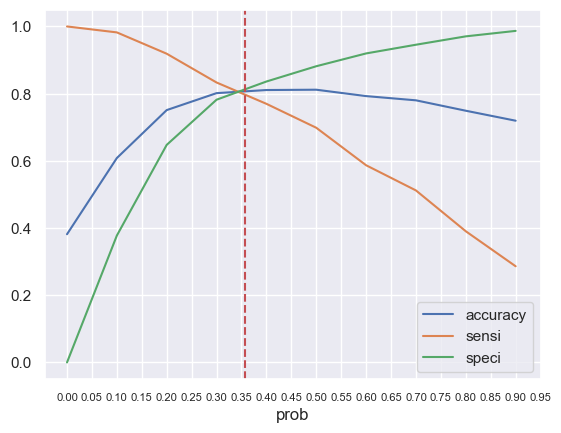

In [358]:
# Plotting accuracy, sensitivity and specificity for various probabilities:-


#plt.figure(figsize=(20,5))
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.axvline(x=0.358, color='r', linestyle='--') # additing axline

plt.show()

#### From the curve above, it seems that  0.358 is optimal cutoff point to take .

In [359]:
# Calculating 'final_predicted' based on 'Converted_Prob' using 0.358 cutoff point:-

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.358 else 0)

In [360]:
# Dropping the unnecessary columns:-

y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],axis = 1, inplace = True) 

In [361]:
#Displaying the head:-

y_train_pred_final.head() 

Converted  Converted_Prob  Prospect ID  final_predicted
0          0            0.05          302                0
1          0            0.02         6087                0
2          0            0.22         1033                0
3          0            0.16         7656                0
4          1            0.77         3241                1

### Assigning lead score to the leads based to prediction

In [362]:
# Assigning the 'Lead_Score' based on 'Converted_Prob' :-

y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_Prob.map( lambda x: round(x*100))

In [363]:
# Selecting only important columns and displaying head of dataframe:-

y_train_pred_final[['Converted','Converted_Prob','Prospect ID','final_predicted','Lead_Score']].head()

Converted  Converted_Prob  Prospect ID  final_predicted  Lead_Score
0          0            0.05          302                0           5
1          0            0.02         6087                0           2
2          0            0.22         1033                0          22
3          0            0.16         7656                0          16
4          1            0.77         3241                1          77

## Step 9:Model Evaluation

In [364]:
#Importing 'metrics' library:-

from sklearn import metrics

# Confusion matrix:-

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
print(confusion)

[[3201  734]
 [ 487 1941]]


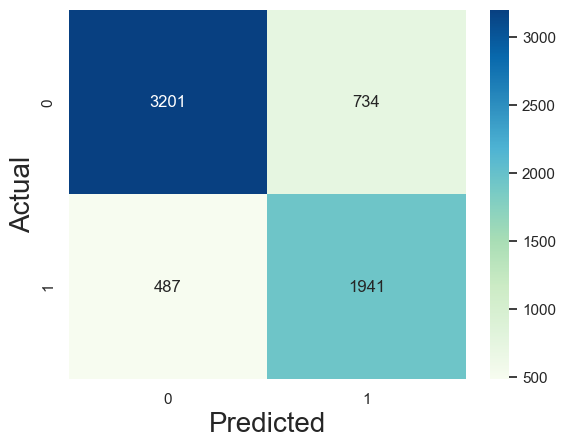

In [366]:

# Plotting confusion matrix:-
sns.heatmap(confusion, annot=True,fmt='g',cmap='GnBu')
plt.xlabel('Predicted',fontsize=20)
plt.ylabel('Actual',fontsize=20)
plt.show()

In [368]:
# Actual/Predicted     not_converted   converted
        # not_converted        3201          734
        # converted            487          1941

In [369]:
# Check the overall accuracy:-

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8081093823668081

In [370]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [371]:
# Checking the sensitivity of our logistic regression model:-

TP / float(TP+FN)

0.7994233937397035

In [372]:
# Calculating specificity:-

TN / float(TN+FP)

0.8134688691232529

In [373]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert:-

print(FP/ float(TN+FP))

0.18653113087674714


In [374]:
# positive predictive value :-

print (TP / float(TP+FP))

0.7256074766355141


In [375]:
# Negative predictive value:-

print (TN / float(TN+ FN))

0.8679501084598699


## Precision and Recall

In [376]:
##### Precision
TP / TP + FP

735.0

In [377]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7256074766355141

In [378]:
##### Recall
TP / TP + FN

488.0

In [379]:
# Calculating 'Recall' :-

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7994233937397035

Using sklearn utilities for the same

In [380]:
#Importing 'precision_score' and 'recall_score':_

from sklearn.metrics import precision_score, recall_score

In [381]:
# Calculating Precision value:-

precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7256074766355141

In [382]:
#Calculating Recall value:-

recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7994233937397035

### Observation

We have the following values for the Train Data:

- Accuracy :    80%
- Sensitivity : 80%
- Specificity : 81%
- Pricision:    72%
- Recall:       80%

## Step 10: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [383]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [384]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

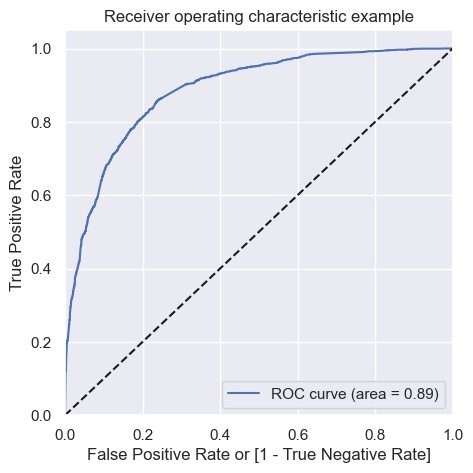

In [385]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Observation

We are getting a good value of 0.89 indicating a good predictive model.As ROC Curve should be a value close to 1. 

### Precision and recall tradeoff

In [386]:
# Importing required library for 'precision_recall_curve' :-

from sklearn.metrics import precision_recall_curve

In [387]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

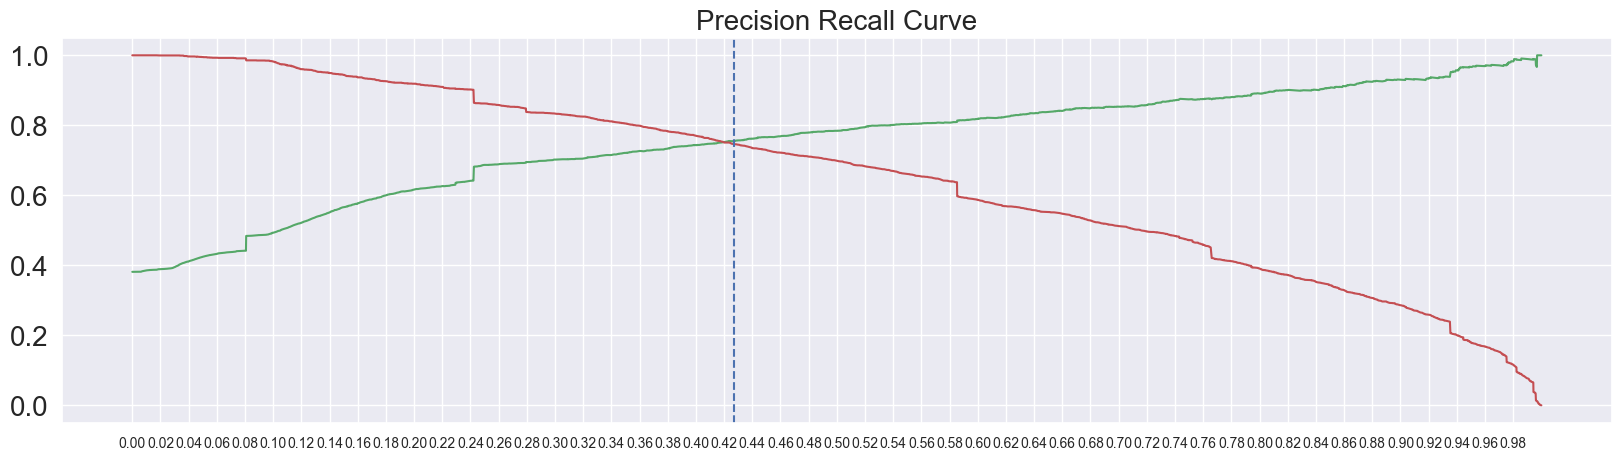

In [388]:
plt.figure(figsize=(20,5))
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.title('Precision Recall Curve',fontsize=20)
plt.axvline(x=0.427, color='b', linestyle='--') # additing axline
plt.xticks(np.arange(0,1,step=0.02),size=10)
plt.yticks(size=20)

plt.show()

### Observation
From above above 'precision_recall_curve' we can see that cutoff point is 0.427.

### Now using this threshold value from 'Precision Recall Tradeoff Curve' for Data Evaluation

In [389]:
# plotting the Train dataset again with 0.427 as cutoff:-

y_train_pred_final['final_predicted_2'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.427 else 0)
y_train_pred_final.head() # Displaying head 

Converted  Converted_Prob  Prospect ID  final_predicted  Lead_Score  \
0          0            0.05          302                0           5   
1          0            0.02         6087                0           2   
2          0            0.22         1033                0          22   
3          0            0.16         7656                0          16   
4          1            0.77         3241                1          77   

   final_predicted_2  
0                  0  
1                  0  
2                  0  
3                  0  
4                  1

In [390]:
# Confusion matrix:-

confusion_2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted_2)
print(confusion_2)

[[3348  587]
 [ 615 1813]]


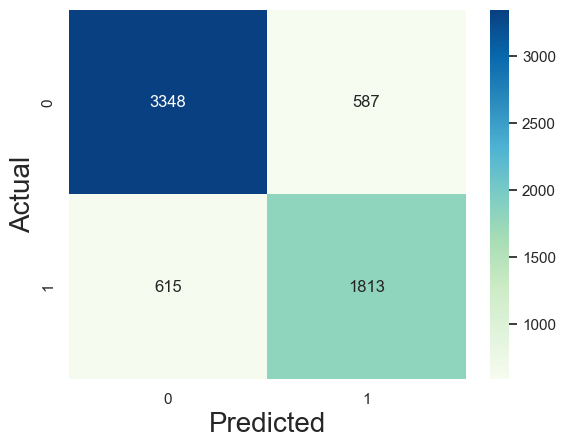

In [391]:
# Plotting confusion matrix:-
sns.heatmap(confusion_2, annot=True,fmt='g',cmap='GnBu')
plt.xlabel('Predicted',fontsize=20)
plt.ylabel('Actual',fontsize=20)
plt.show()

In [392]:
# Check the overall accuracy:-

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted_2)

0.8110953952538111

In [393]:
TP = confusion_2[1,1] # true positive 
TN = confusion_2[0,0] # true negatives
FP = confusion_2[0,1] # false positives
FN = confusion_2[1,0] # false negatives

In [394]:
# Checking the sensitivity of our logistic regression model:-

TP / float(TP+FN)

0.7467051070840197

In [395]:
# Calculating specificity:-

TN / float(TN+FP)

0.8508259212198221

In [396]:
# positive predictive value :-

print (TP / float(TP+FP))

0.7554166666666666


In [397]:
# Negative predictive value:-

print (TN / float(TN+ FN))

0.8448145344436033


In [398]:
# Pricision:-

confusion_2[1,1]/(confusion_2[0,1]+confusion_2[1,1])

0.7554166666666666

In [399]:
# Calculating 'Recall' :-

confusion_2[1,1]/(confusion_2[1,0]+confusion_2[1,1])

0.7467051070840197

### Observation
By using the Precision - Recall trade off curve cut off point True Positive number has decrease and True Negative number has increase

Thus, we cannot use Precision-Recall trade-off method as it reduced True Positive so 'Recall'/'sensitivity' decreased for this point We have to increase Sensitivity Recall value to increase True Positives. Thus we will use 0.358 as optimal cutoff point.

## Step 11: Making predictions on the test set

#### Applying scaling on test data 

In [401]:
# Applying 'transform' to scale the 'test' data set:-

X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [416]:
# Predicting using values used by the final model i.e. logm3:-

test_col = X_train_sm3.columns

X_test=X_test[test_col[1:]]
# Adding constant variable to test dataframe:-
X_test = sm.add_constant(X_test)

X_test.info() #Displaying info about columns

<class 'pandas.core.frame.DataFrame'>
Index: 2727 entries, 6906 to 6219
Data columns (total 14 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   const                                       2727 non-null   float64
 1   Lead Origin_Lead Add Form                   2727 non-null   bool   
 2   Lead Origin_Lead Import                     2727 non-null   bool   
 3   Lead Origin_Quick Add Form                  2727 non-null   bool   
 4   Lead Source_Facebook                        2727 non-null   bool   
 5   Lead Source_Olark Chat                      2727 non-null   bool   
 6   Lead Source_Welingak Website                2727 non-null   bool   
 7   Last Activity_SMS Sent                      2727 non-null   bool   
 8   Last Activity_Unsubscribed                  2727 non-null   bool   
 9   What is your current occupation_Other       2727 non-null   bool   
 10  What is your c

In [417]:
# Convert all boolean values in the DataFrame to integers (element-wise)
X_test = X_test.applymap(lambda x: int(x) if isinstance(x, bool) else x)
 
print(X_test)

      const  Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
6906   1.00                          0                        0   
1873   1.00                          0                        0   
771    1.00                          0                        0   
4495   1.00                          0                        0   
9061   1.00                          0                        0   
...     ...                        ...                      ...   
1939   1.00                          0                        0   
1540   1.00                          0                        0   
5198   1.00                          0                        0   
8660   1.00                          0                        0   
6219   1.00                          0                        0   

      Lead Origin_Quick Add Form  Lead Source_Facebook  \
6906                           0                     0   
1873                           0                     0   
771                  

#### Making Predictions on the X_test dataset using the final model

In [418]:
# Predicting on test data set using final model :-

y_test_pred = logm3.predict(X_test)

In [419]:
# Checking top 10 rows:-

y_test_pred[:10]

6906   0.32
1873   0.32
771    0.10
4495   0.10
9061   0.03
4929   0.10
2308   0.03
1034   0.10
9033   0.10
7008   0.32
dtype: float64

In [420]:
# Converting y_test_pred to a dataframe :-

y_pred_1 = pd.DataFrame(y_test_pred)

In [421]:
# Let's see the head
y_pred_1.head()

0
6906 0.32
1873 0.32
771  0.10
4495 0.10
9061 0.03

In [422]:
# Converting y_test to dataframe:-

y_test_df = pd.DataFrame(y_test)

In [423]:
# Putting 'Prospect ID' to index:-

y_test_df['Prospect ID'] = y_test_df.index


In [424]:
# Removing index for both dataframes to append them side by side :-

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [425]:
# Appending y_test_df and y_pred_1:-

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [426]:
# Displaying head of 'y_pred_final' :-

y_pred_final.head()

Converted  Prospect ID    0
0          1         6906 0.32
1          0         1873 0.32
2          0          771 0.10
3          0         4495 0.10
4          1         9061 0.03

In [427]:
# Renaming the column '0' as 'Converted_Prob':-

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [428]:
# Rearranging the columns:-

y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_Prob']]

In [429]:
# Let's see the head of y_pred_final:-

y_pred_final.head()

Prospect ID  Converted  Converted_Prob
0         6906          1            0.32
1         1873          0            0.32
2          771          0            0.10
3         4495          0            0.10
4         9061          1            0.03

In [430]:
#Assigning 'Lead Score' to dataframe 'y_pred_final':-

y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map( lambda x: round(x*100))

In [431]:

y_pred_final.head()

Prospect ID  Converted  Converted_Prob  Lead_Score
0         6906          1            0.32          32
1         1873          0            0.32          32
2          771          0            0.10          10
3         4495          0            0.10          10
4         9061          1            0.03           3

#### Using Cutoff point of 0.357 from Sentivity - Specificity - Accuracy plot cut-off point

In [432]:
# Calculating 'final_Predicted' based on 'Converted_Prob' for cutoff point 0.357:-

y_pred_final['final_Predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.357 else 0)

In [433]:
# Displaying the head of 'y_pred_final' dataframe:-

y_pred_final.head()

Prospect ID  Converted  Converted_Prob  Lead_Score  final_Predicted
0         6906          1            0.32          32                0
1         1873          0            0.32          32                0
2          771          0            0.10          10                0
3         4495          0            0.10          10                0
4         9061          1            0.03           3                0

### Test model evaluation

In [435]:
# Checking the overall accuracy:-

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7312064539787312

#### Confusion Matrix

In [437]:
# Calculating confusion matrix for test data:-

confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1610,   50],
       [ 683,  384]], dtype=int64)

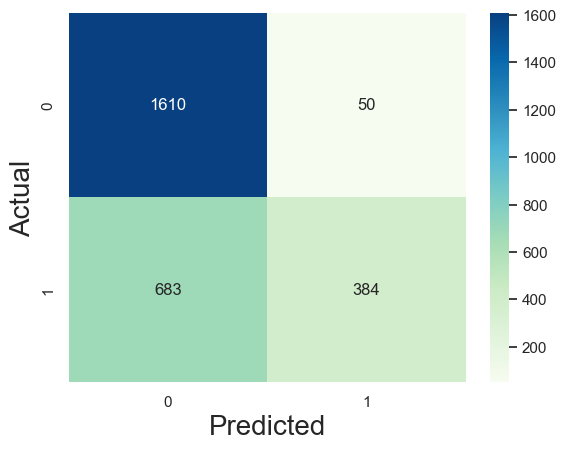

In [438]:
# Plotting confusion matrix:-
sns.heatmap(confusion2, annot=True,fmt='g',cmap='GnBu')
plt.xlabel('Predicted',fontsize=20)
plt.ylabel('Actual',fontsize=20)
plt.show()

In [439]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [440]:
# Let's see the sensitivity of our logistic regression model:-

TP / float(TP+FN)

0.3598875351452671

In [441]:
# Let us calculate specificity:-

TN / float(TN+FP)

0.9698795180722891

In [442]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert:-

print(FP/ float(TN+FP))

0.030120481927710843


In [443]:
# positive predictive value :-

print (TP / float(TP+FP))

0.8847926267281107


In [444]:
# Negative predictive value:-

print (TN / float(TN+ FN))

0.7021369385085041


### Precision and Recall

In [445]:
# Calculating 'precision_score':-

precision_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8847926267281107

In [446]:
#Calculating 'recall_score':-

recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.3598875351452671

### Observation

The sensitivity value for test data is 80% while for train data is also 80% . The accuracy values is ~ 80%. Which shows that model is performing well for test data set also.

### Determining top feature based on final model (logm5)

In [448]:
# Displaying parameters obtained by final model 'logm5':-

pd.options.display.float_format = '{:.2f}'.format # Setting format option
logm3.params[1:]

Lead Origin_Lead Add Form                      3.42
Lead Origin_Lead Import                       20.22
Lead Origin_Quick Add Form                    19.97
Lead Source_Facebook                         -20.52
Lead Source_Olark Chat                         1.09
Lead Source_Welingak Website                   2.84
Last Activity_SMS Sent                         1.49
Last Activity_Unsubscribed                     1.54
What is your current occupation_Other         -3.78
What is your current occupation_Student       -2.56
What is your current occupation_Unemployed    -2.49
Do Not Email                                  -1.61
Total Time Spent on Website                    1.09
dtype: float64

In [449]:
#Getting a relative coeffient value for all the features wrt the feature with the highest coefficient:-

top_feature = logm3.params[1:]
top_feature = 100.0 * (top_feature / top_feature.max())
top_feature

Lead Origin_Lead Add Form                      16.89
Lead Origin_Lead Import                       100.00
Lead Origin_Quick Add Form                     98.74
Lead Source_Facebook                         -101.48
Lead Source_Olark Chat                          5.41
Lead Source_Welingak Website                   14.02
Last Activity_SMS Sent                          7.35
Last Activity_Unsubscribed                      7.63
What is your current occupation_Other         -18.71
What is your current occupation_Student       -12.67
What is your current occupation_Unemployed    -12.32
Do Not Email                                   -7.95
Total Time Spent on Website                     5.40
dtype: float64

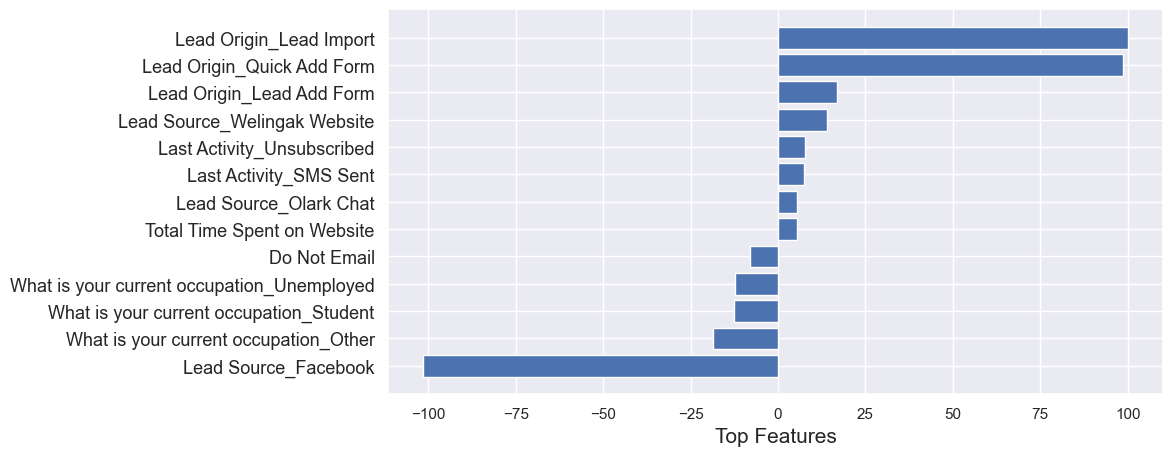

In [450]:
# Plotting the feature variables based on their relative importance:-

top_feature_sort = np.argsort(top_feature,kind='quicksort',order='list of str')

pos = np.arange(top_feature_sort.shape[0]) + .5

fig1 = plt.figure(figsize=(10,5))
ax = fig1.add_subplot(1, 1, 1)
ax.barh(pos, top_feature[top_feature_sort])
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X_train_new.columns)[top_feature_sort], fontsize=13)
ax.set_xlabel('Top Features', fontsize=15)
plt.show()

### Final model line equation :-

****Converted = 0.261843 + 3.15 X Lead Source_Welingak Website + 2.98 X Lead Origin_Lead Add Form  + 2.39 X What is your current occupation_Working Professional + 1.45 X Last Activity_Unsubscribed + 1.38 X Last Activity_SMS Sent + 1.17 X Lead Source_Olark Chat + 1.07 X Total Time Spent on Website - 0.87 X Lead Origin_Landing Page Submission - 0.87 X Specialization_Other - 0.96 X Specialization_Hospitality Management - 1.19 X What is your current occupation_Other - 1.22 X Last Activity_Olark Chat Conversation****

### Final Observation

Evaluation Metrics for the train Dataset:-
- Accuracy :0.80
- Sensitivity:~0.80
- Specificity:0.81
- Precision: 0.72
- Recall:    0.80

Evaluation Metrics for the test Dataset:-
- Accuracy : 0.80
- Sensitivity: ~ 0.80
- Specificity: 0.80
- Precision: 0.72
- Recall: 0.80

## Recommendation

To improve the potential lead conversion rate X-Education will have to mainly focus important features responsible for good conversion rate are :-

- Lead Source_Welingak Website : As conversion rate is higher for those leads who got to know about course from 'Welingak Website',so company can focus on this website to get more number of potential leads.

- Lead Origin_Lead Add Form: Leads who have engaged through 'Lead Add Form' having higher conversion rate so company can focus on it to get more number of leads cause  have a higher chances of getting converted.

- What is your current occupation_Working Professional : The lead whose occupation is 'Working Professional' having higher lead conversion rate ,company should focus on working professionals nad try to get more number of leads.
- Last Activity_SMS Sent: Lead whose last activity is sms sent can be potential lead for company.

- Total Time Spent on website: Leads spending more time on website can be our potential lead.